In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df=pd.read_csv('/content/Online_Retail.xlsx - Online Retail.csv')

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [ ]:
df.shape

(541909, 8)

In [ ]:

df[df['CustomerID'].isnull()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

          InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/10 11:52       0.00         NaN  United Kingdom  
1443    12/1/10 14:32       2.51         NaN  United Kingdom  
1444    12/1/10 14:32       2.51         NaN  United Kingdom  
1445    12/1/10 14:32       0.85         NaN  United Kingdom  
1446    12/1/10 14:32       1.66         NaN  United Kingdom  
...               ...        ...         ...             ...  
541536  12/9/11 10:26       4.13         NaN  United Kingdom  
541537  12/9/11 10:26       4.13         NaN  United Kingdom  
541538  12/9/11 10:26       4.96         NaN  United Kingdom  
541539  12/9/11 10:26      10.79         NaN  United Kingdom  
541540  12/9/11 10:26    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.describe().T

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

In [ ]:
df.describe(include='object').T

count unique                                 top    freq
InvoiceNo    541909  25900                              573585    1114
StockCode    541909   4070                              85123A    2313
Description  540455   4223  WHITE HANGING HEART T-LIGHT HOLDER    2369
InvoiceDate  541909  23260                      10/31/11 14:41    1114
Country      541909     38                      United Kingdom  495478

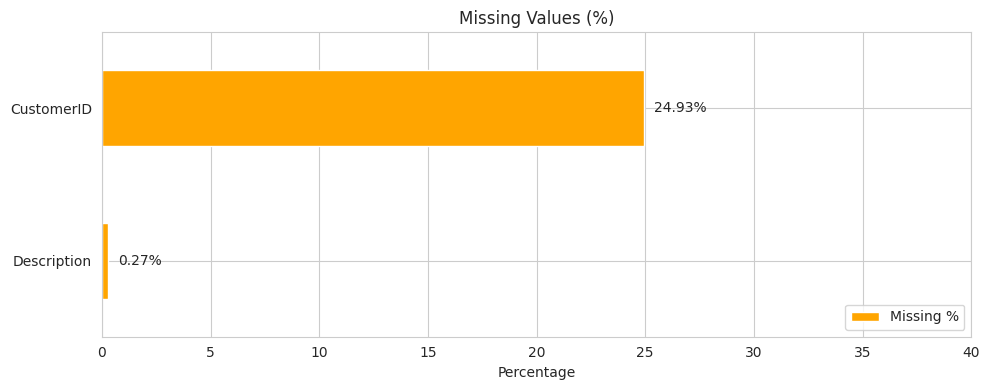

In [ ]:
# Calculate missing value percentages
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values()

# Plot
ax = missing.plot(kind='barh', color='orange', figsize=(10, 4), label='Missing %')

# Add value labels
for i, v in enumerate(missing):
    ax.text(v + 0.5, i, f"{v:.2f}%", va='center', fontsize=10)

# Add title, labels, legend, and set x-axis limit
plt.title("Missing Values (%)")
plt.xlabel("Percentage")
plt.xlim(0, 40)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()






In [ ]:
df = df.dropna(subset=['CustomerID','Description']) ## Droping the null values

In [ ]:
df.isnull().sum() ## Checking for null values


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
## Finding duplicate rows (mark all copies as duplicates)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

InvoiceNo StockCode                       Description  Quantity  \
494    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
485    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
539    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
527    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
521    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
537    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
578    536412     21448         12 DAISY PEGS IN WOOD BOX         1   
598    536412     21448         12 DAISY PEGS IN WOOD BOX         1   

       InvoiceDate  UnitPrice  CustomerID         Country  
494  12/1/10 11:45       1.25     17908.0  United Kingdom  
517  12/1/10 11:45       1.25     17908.0  United Kingdom  
485  12/1/10 11:45       4.95     17908.0  United Kingdom  
539  12/1/10 11:45       4.95     17908.0  United Kingdom  
489  12/1/10 11:45       2.10     17908.0  United Kingdom  
527  12/1/10 11:45       2.10     17908.0  United Kingdom  
521  12/1/10 11:45       2.95     17908.0  United Kingdom  
537  12/1/10 11:45       2.95     17908.0  United Kingdom  
578  12/1/10 11:49       1.65     17920.0  United Kingdom  
598  12/1/10 11:49       1.65     17920.0  United Kingdom

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 5225


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:

df.shape[0] ## After removing duplicates

401604

In [ ]:
import numpy as np

# Step 1: Mark transaction status based on whether InvoiceNo starts with 'C'
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Step 2: Filter cancelled transactions
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']

# Step 3: Get statistical summary (excluding CustomerID)
cancelled_transactions.describe().drop('CustomerID', axis=1, errors='ignore')


Quantity     UnitPrice
count   8872.000000   8872.000000
mean     -30.774910     18.899512
std     1172.249902    445.190864
min   -80995.000000      0.010000
25%       -6.000000      1.450000
50%       -2.000000      2.950000
75%       -1.000000      4.950000
max       -1.000000  38970.000000

In [ ]:
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100
print(f"Percentage of Cancelled Transactions: {cancelled_percentage:.3f}%")

Percentage of Cancelled Transactions: 2.209%


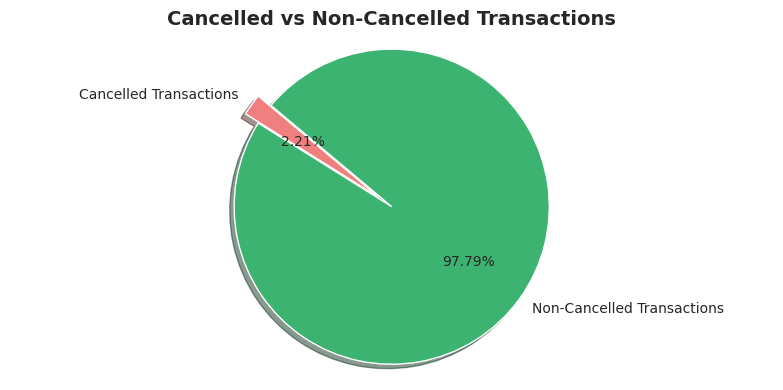

In [ ]:
import matplotlib.pyplot as plt

# Identify cancelled and non-cancelled transactions
cancelled_count = df[df['InvoiceNo'].str.startswith('C')].shape[0]
non_cancelled_count = df[~df['InvoiceNo'].str.startswith('C')].shape[0]

# Data for the plot
labels = ['Cancelled Transactions', 'Non-Cancelled Transactions']
sizes = [cancelled_count, non_cancelled_count]
colors = ['lightcoral', 'mediumseagreen']
explode = (0.1, 0)  # explode the cancelled section for emphasis

# Pie Chart
plt.figure(figsize=(8, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('Cancelled vs Non-Cancelled Transactions', fontsize=14, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.show()


In [ ]:
## Verifying stock codes
unique_stock_codes = df['StockCode'].nunique()
print(f"Number of unique stock codes: {unique_stock_codes}")

Number of unique stock codes: 3684


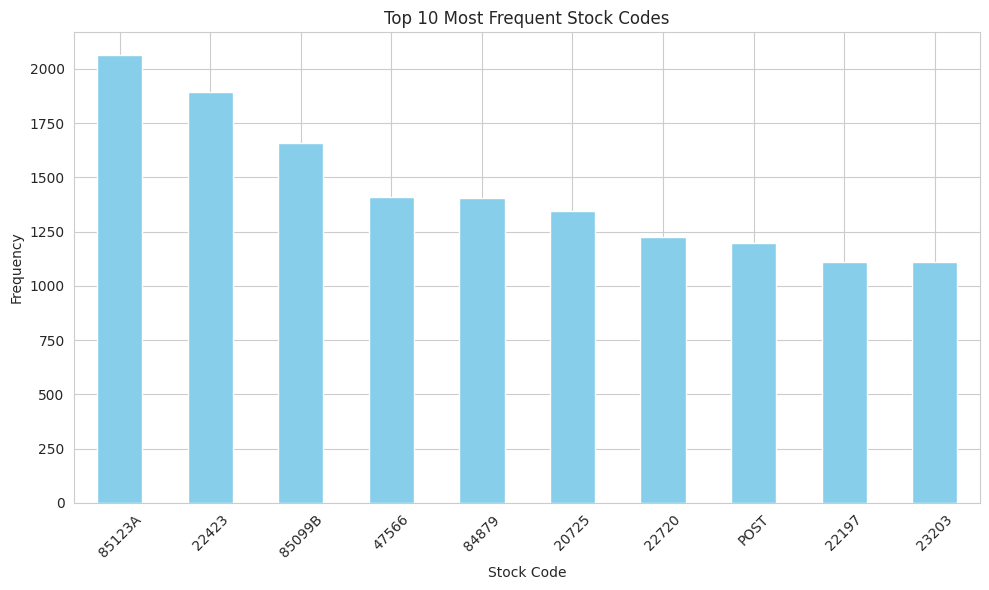

In [ ]:
# Step 1: Count frequency of each stock code
top_10_stocks = df['StockCode'].value_counts().head(10)

# Step 2: Plot bar chart
plt.figure(figsize=(10, 6))
top_10_stocks.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Stock Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)


Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


In [ ]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [ ]:
# Step 1: Define the condition to detect anomalous codes
anomalous_stock_codes = [code for code in df['StockCode'].unique()
                         if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Step 2: Remove rows with those codes
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

# Optional: Reset index if needed
df = df.reset_index(drop=True)

In [ ]:
df.shape[0]  ## Removed the anomalous StockCodes

399689

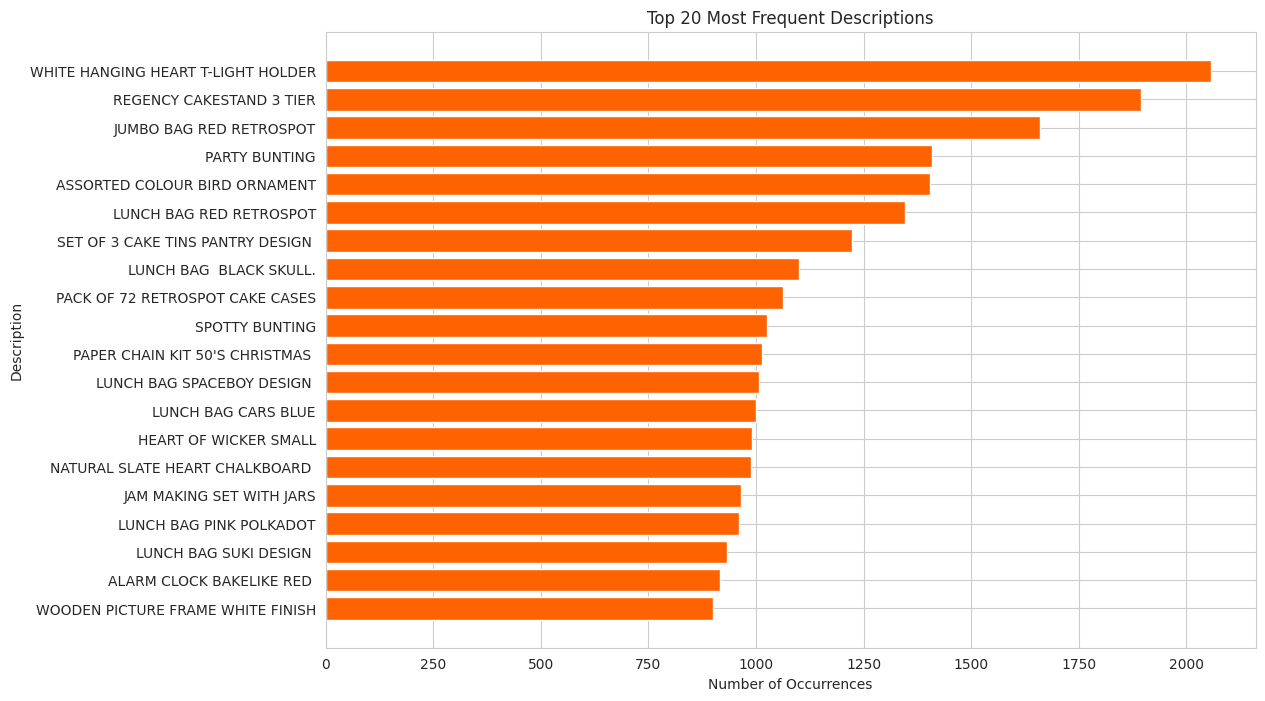

In [ ]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 20 descriptions
top_20_descriptions = description_counts[:20]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_20_descriptions.index[::-1], top_20_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 20 Most Frequent Descriptions')

# Show the plot
plt.show()

In [ ]:
# Ensure the 'Description' column is of string type
df['Description'] = df['Description'].astype(str)

# Get unique descriptions
unique_descriptions = df['Description'].unique()

# Filter: contains at least one lowercase OR a question mark
filtered_descriptions = [
    desc for desc in unique_descriptions
    if '?' in desc or any(char.islower() for char in desc)
]

# Print the result
print("Descriptions containing lowercase letters OR a question mark:")
print("-" * 60)
for desc in filtered_descriptions:
    print(desc)


Descriptions containing lowercase letters OR a question mark:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [ ]:
## The ones with description as "?, ?missing?, ??sold as sets??" ,these orders were returned and quantity is negative.
## These negative quantity rows were already removed

In [ ]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]
# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]

In [ ]:
df.shape[0]

399606

In [ ]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [ ]:
## Removing zero values from Unit price
df['UnitPrice'].describe() ## Here the minimum value is zero and we need to remove it

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [ ]:
df[df['UnitPrice']==0].describe()[['Quantity']] ## There are 33 quantity with zero UnitPrice

Quantity
count     33.000000
mean     420.515152
std     2176.713608
min        1.000000
25%        2.000000
50%       11.000000
75%       36.000000
max    12540.000000

In [ ]:
df = df[df['UnitPrice'] > 0]

In [ ]:
## Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [ ]:
# Group by CustomerID, InvoiceNo, and Country, then count the occurrences
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()

# Reset index to turn groupby result back into a DataFrame
temp = temp.reset_index(drop=False)

# Count the number of unique occurrences per country
countries = temp['Country'].value_counts()

# Print the number of countries in the DataFrame
print('Total Number of countries : {}'.format(len(countries)))


Total Number of countries : 37


In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot

data = dict(
    type='choropleth',
    locations=countries.index,
    locationmode='country names',
    z=countries,
    text=countries.index,
    colorbar={'title': 'Order nb.'},
    colorscale=[
        [0, 'rgb(224,255,255)'],
        [0.01, 'rgb(166,206,227)'],
        [0.02, 'rgb(31,120,180)'],
        [0.03, 'rgb(178,223,138)'],
        [0.05, 'rgb(51,160,44)'],
        [0.10, 'rgb(251,154,153)'],
        [0.20, 'rgb(255,255,0)'],
        [1, 'rgb(227,26,28)']
    ],
    reversescale=False
)

# Enlarged layout
layout = dict(
    title='Number of Orders per Country',
    geo=dict(showframe=True, projection={'type': 'mercator'}),
    width=1000,
    height=600
)

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)




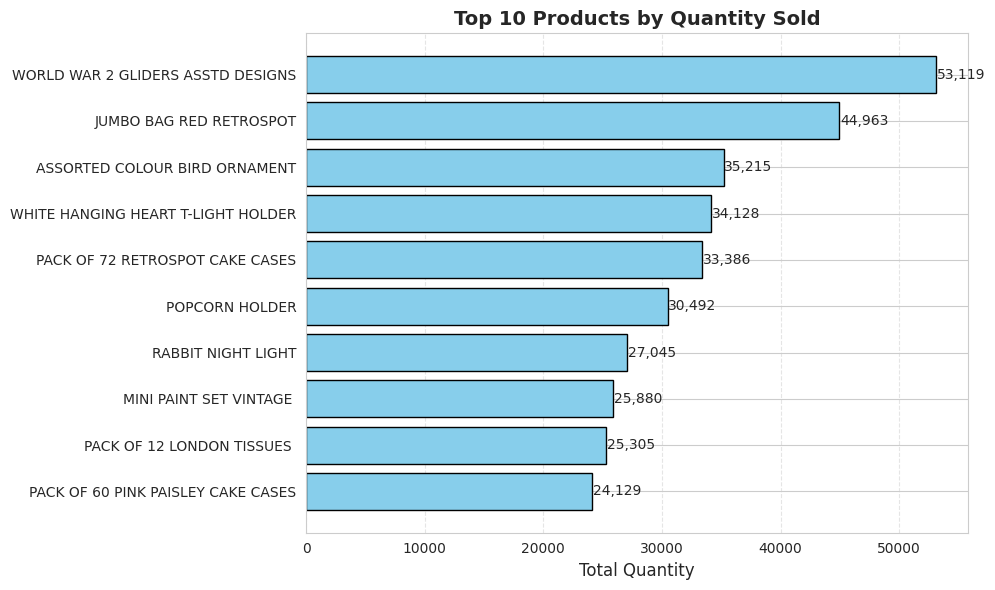

In [ ]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_products.index, top_products.values, color='skyblue', edgecolor='black')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, f'{int(width):,}', va='center', fontsize=10)

plt.title('Top 10 Products by Quantity Sold', fontsize=14, weight='bold')
plt.xlabel('Total Quantity', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




In [ ]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']


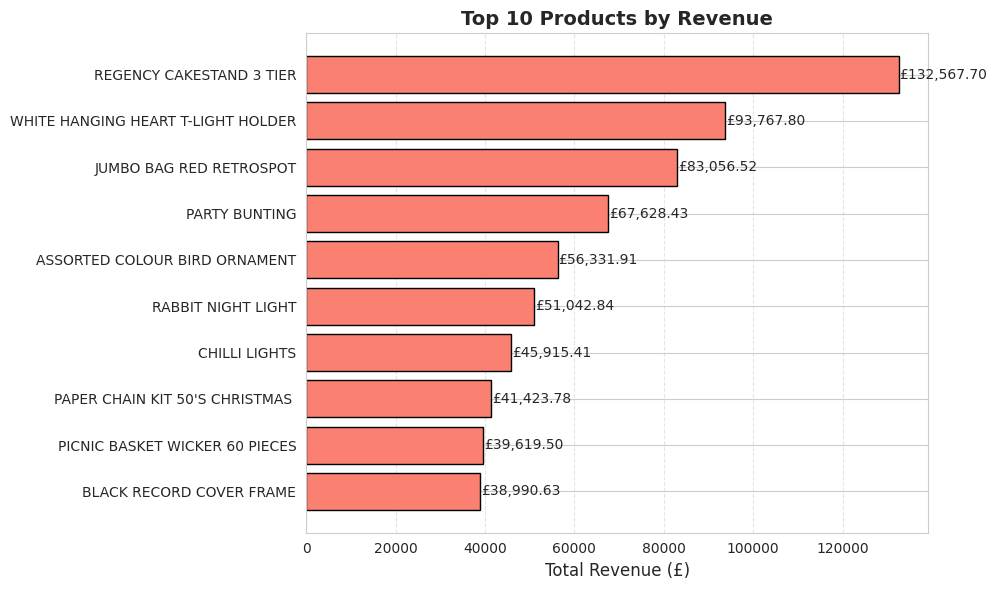

In [ ]:
# Group and sort by total revenue
top_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_revenue.index, top_revenue.values, color='salmon', edgecolor='black')

# Add value labels with £ symbol
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height()/2, f'£{width:,.2f}', va='center', fontsize=10)

plt.title('Top 10 Products by Revenue', fontsize=14, weight='bold')
plt.xlabel('Total Revenue (£)', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



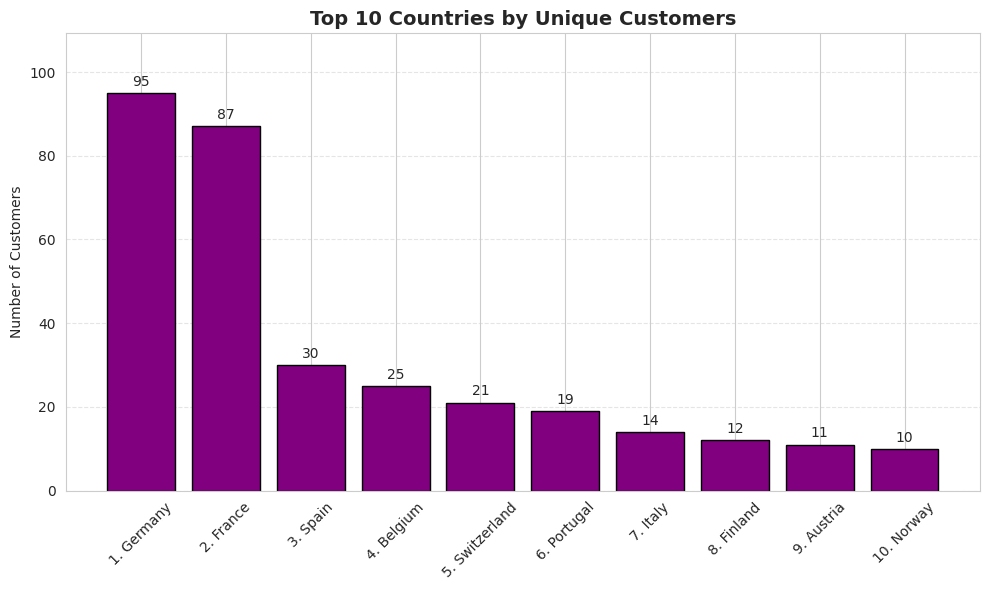

In [ ]:
# Prepare the data
customer_country = (
    df[df['Country'] != 'United Kingdom']
    .groupby('Country')['CustomerID']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

# Add numbering to index
customer_country.index = [f"{i+1}. {country}" for i, country in enumerate(customer_country.index)]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(customer_country.index, customer_country.values, color='purple', edgecolor='black')

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Countries by Unique Customers', fontsize=14, weight='bold')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.ylim(0, max(customer_country.values) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
## Excluded UK, because it is a UK based retail sales and UK is having major customers



/tmp/ipython-input-166-1666820698.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



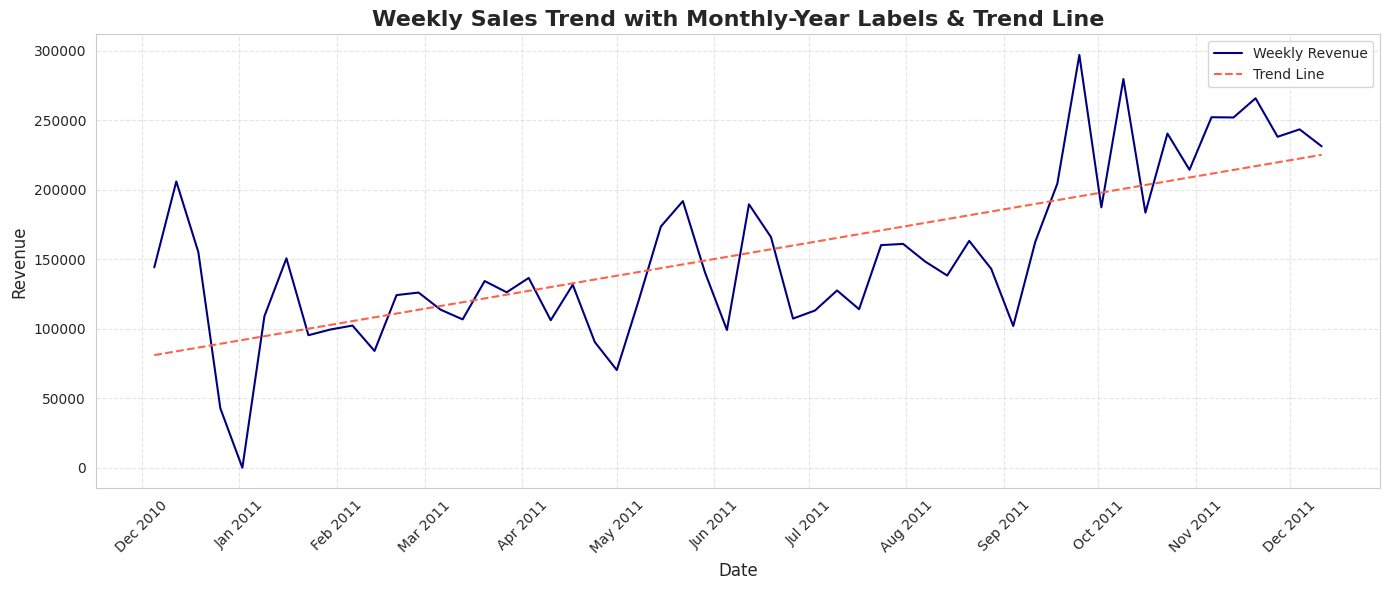

In [ ]:
import numpy as np
import matplotlib.dates as mdates

# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set as index for resampling
df_weekly = df.set_index('InvoiceDate')

# Resample weekly and calculate total revenue
weekly_sales = df_weekly['TotalPrice'].resample('W').sum()

# Create linear trend line
x = np.arange(len(weekly_sales))
y = weekly_sales.values
coeffs = np.polyfit(x, y, deg=1)
trend = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(weekly_sales.index, y, label='Weekly Revenue', color='navy')
plt.plot(weekly_sales.index, trend(x), label='Trend Line', color='tomato', linestyle='--')

# Format x-axis: month + year (e.g., Jan 2021)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Styling
plt.title('Weekly Sales Trend with Monthly-Year Labels & Trend Line', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-167-3130695559.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-167-3130695559.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




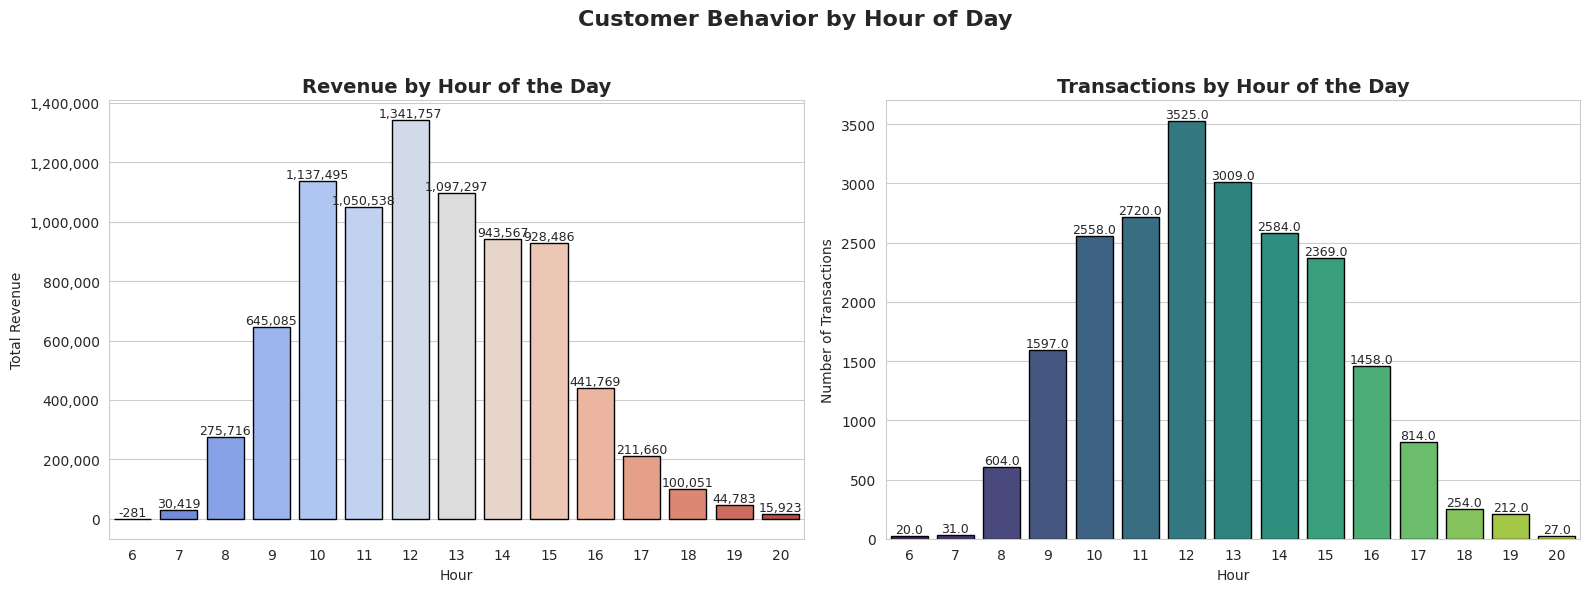

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Ensure required columns exist
df['Hour'] = df['InvoiceDate'].dt.hour
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Aggregate revenue and transaction count per hour
hourly_stats = df.groupby('Hour').agg(
    TotalRevenue=('Revenue', 'sum'),
    Transactions=('InvoiceNo', 'nunique')
).reset_index()

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# 1. Revenue plot
sns.barplot(x='Hour', y='TotalRevenue', data=hourly_stats, palette='coolwarm', ax=axes[0], edgecolor='black')
axes[0].set_title('Revenue by Hour of the Day', fontsize=14, weight='bold')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Total Revenue')
axes[0].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
for bar in axes[0].patches:
    value = bar.get_height()
    axes[0].annotate(f'{value:,.0f}', (bar.get_x() + bar.get_width() / 2, value),
                     ha='center', va='bottom', fontsize=9)

# 2. Transaction count plot
sns.barplot(x='Hour', y='Transactions', data=hourly_stats, palette='viridis', ax=axes[1], edgecolor='black')
axes[1].set_title('Transactions by Hour of the Day', fontsize=14, weight='bold')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Number of Transactions')
for bar in axes[1].patches:
    value = bar.get_height()
    axes[1].annotate(f'{value}', (bar.get_x() + bar.get_width() / 2, value),
                     ha='center', va='bottom', fontsize=9)

# Overall formatting
plt.suptitle('Customer Behavior by Hour of Day', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()









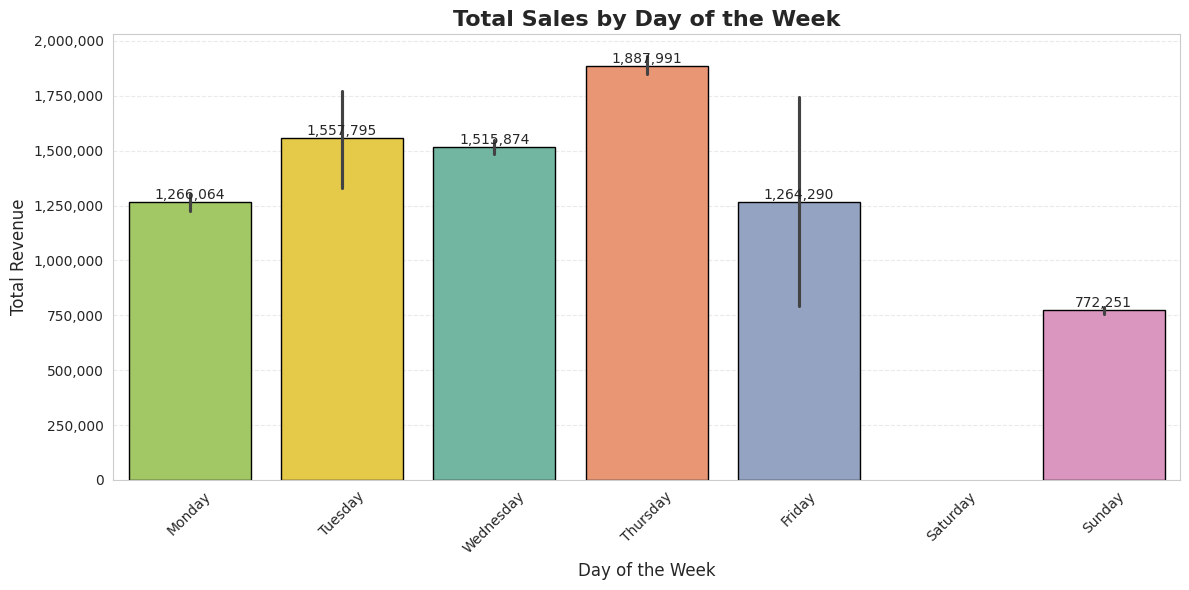

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Extract day name from InvoiceDate
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Day order for x-axis
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='DayOfWeek',
    y='TotalPrice',
    data=df,
    estimator=sum,
    order=order,
    hue='DayOfWeek',  # Assign the x variable to hue
    palette='Set2',
    legend=False, # Disable the legend
    edgecolor='black'
)

# Add value labels on top of bars
for bar in ax.patches:
    value = bar.get_height()
    ax.annotate(f'{value:,.0f}',  # format with comma separator
                xy=(bar.get_x() + bar.get_width() / 2, value),
                ha='center', va='bottom', fontsize=10)

# Formatting
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # y-axis with commas
plt.title('Total Sales by Day of the Week', fontsize=16, weight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



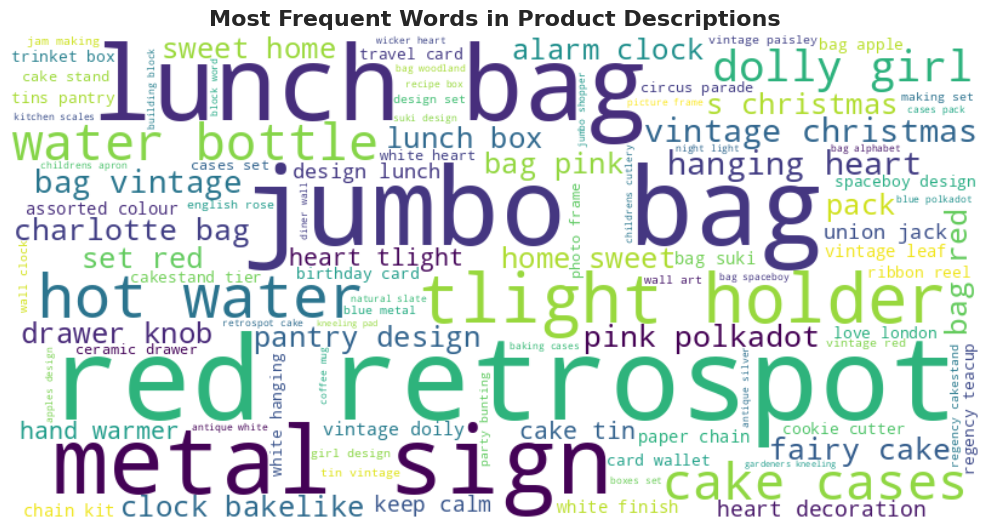

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

# Clean up the product descriptions and combine them into a single string
descriptions = ' '.join(df['Description'].dropna().astype(str))

# Clean the text by removing any non-alphanumeric characters
descriptions_cleaned = re.sub(r'[^A-Za-z\s]', '', descriptions.lower())

# Create a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,  # Adjust to show the most frequent words
    colormap='viridis'  # Color map can be adjusted
).generate(descriptions_cleaned)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Most Frequent Words in Product Descriptions', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()



In [ ]:
# Convert InvoiceDate to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

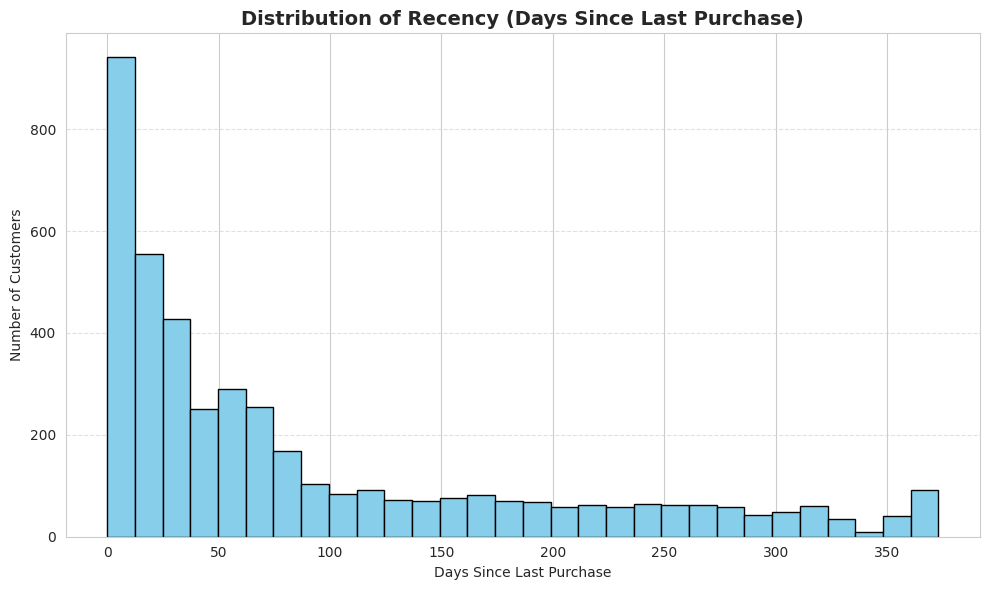

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(customer_data['Days_Since_Last_Purchase'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Recency (Days Since Last Purchase)', fontsize=14, weight='bold')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
customer_data.head()

CustomerID  Days_Since_Last_Purchase
0     12346.0                       325
1     12347.0                         2
2     12348.0                        75
3     12349.0                        18
4     12350.0                       310

In [ ]:
# Merge transactions
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Merge quantity
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge into customer_data
customer_data = customer_data.merge(total_transactions, on='CustomerID', how='left')
customer_data = customer_data.merge(total_products_purchased, on='CustomerID', how='left')




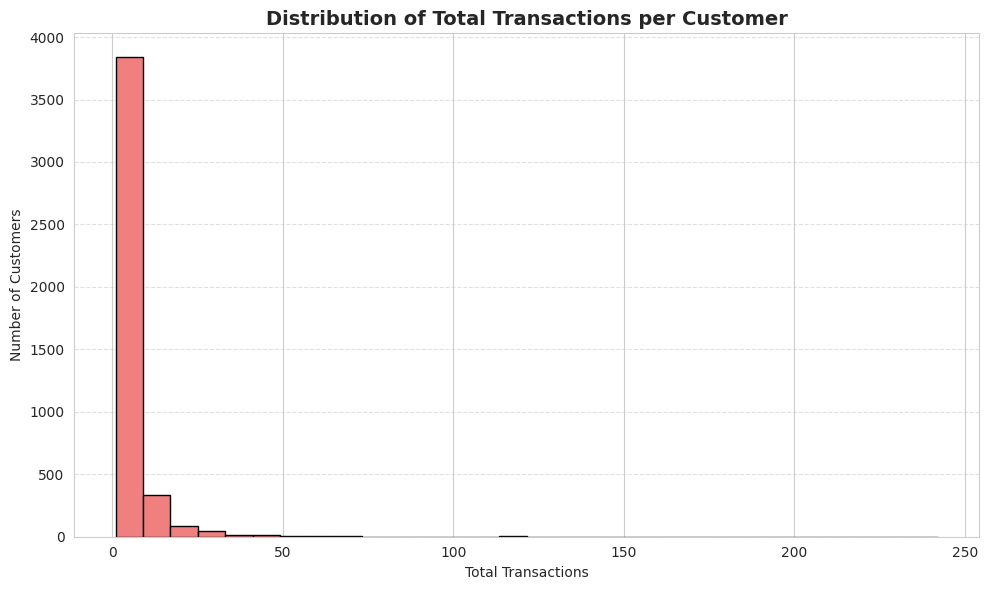

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(customer_data['Total_Transactions'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Total Transactions per Customer', fontsize=14, weight='bold')
plt.xlabel('Total Transactions')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Calculate Total Spend
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Step 2: Calculate Total Transactions
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Step 3: Merge Spend and Transactions
avg_txn_df = pd.merge(total_spend, total_transactions, on='CustomerID')

# Step 4: Calculate Average Transaction Value
avg_txn_df['Average_Transaction_Value'] = avg_txn_df['Total_Spend'] / avg_txn_df['Total_Transactions']

# Step 5: Sort and get Top 5
top5_avg_txn = avg_txn_df.sort_values(by='Average_Transaction_Value', ascending=False).head(5)

# Step 6: Display result
print(top5_avg_txn[['CustomerID', 'Average_Transaction_Value']])



      CustomerID  Average_Transaction_Value
2023     15098.0                9904.875000
10       12357.0                6207.670000
2516     15749.0                5383.975000
55       12415.0                5151.590833
280      12688.0                4873.810000


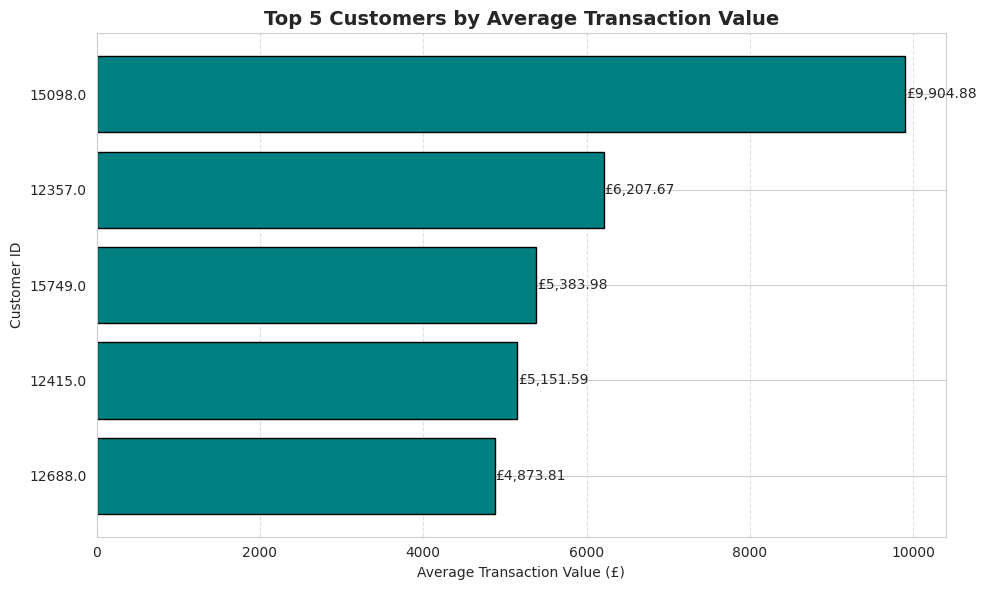

In [ ]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top5_avg_txn['CustomerID'].astype(str), top5_avg_txn['Average_Transaction_Value'], color='teal', edgecolor='black')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'£{width:,.2f}', va='center', fontsize=10)

# Styling
plt.title('Top 5 Customers by Average Transaction Value', fontsize=14, weight='bold')
plt.xlabel('Average Transaction Value (£)')
plt.ylabel('Customer ID')
plt.gca().invert_yaxis()  # Highest value at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
df.nunique()

InvoiceNo             21781
StockCode              3674
Description            3886
Quantity                431
InvoiceDate           20129
UnitPrice               369
CustomerID             4362
Country                  37
Transaction_Status        2
TotalPrice             3755
Hour                     15
Revenue                3755
DayOfWeek                 6
InvoiceDay              305
Total_Spend            3755
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Get unique CustomerIDs
unique_customers = df['CustomerID'].dropna().unique()

# Split CustomerIDs into train and test
train_customers, test_customers = train_test_split(unique_customers, test_size=0.2, random_state=42)

# Create train and test datasets based on these CustomerIDs
train_df = df[df['CustomerID'].isin(train_customers)]
test_df = df[df['CustomerID'].isin(test_customers)]


In [ ]:
# Display the shapes of the split DataFrames
print(f"Training Data Shape: {train_df.shape}")
print(f"Testing Data Shape: {test_df.shape}")

Training Data Shape: (309708, 15)
Testing Data Shape: (89865, 15)


In [ ]:
## RECENCY

# Ensure InvoiceDate is datetime
train_df['InvoiceDate'] = pd.to_datetime(train_df['InvoiceDate'])

# Extract InvoiceDay (just the date part)
train_df['InvoiceDay'] = train_df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer in train set
train_customer_data = train_df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the train dataset
most_recent_date_train = train_df['InvoiceDay'].max()

# Convert types for subtraction
train_customer_data['InvoiceDay'] = pd.to_datetime(train_customer_data['InvoiceDay'])
most_recent_date_train = pd.to_datetime(most_recent_date_train)

# Calculate recency
train_customer_data['Days_Since_Last_Purchase'] = (most_recent_date_train - train_customer_data['InvoiceDay']).dt.days

# Drop InvoiceDay
train_customer_data.drop(columns=['InvoiceDay'], inplace=True)


/tmp/ipython-input-180-3283489004.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-180-3283489004.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train_customer_data.head()

CustomerID  Days_Since_Last_Purchase
0     12346.0                       325
1     12348.0                        75
2     12349.0                        18
3     12352.0                        36
4     12353.0                       204

In [ ]:
## FREQUENCY

# Calculate the total number of transactions per customer in train data
total_transactions_train = train_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions_train.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased per customer in train data
total_products_purchased_train = train_df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased_train.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge with earlier train_customer_data (which has Days_Since_Last_Purchase)
train_customer_data = pd.merge(train_customer_data, total_transactions_train, on='CustomerID')
train_customer_data = pd.merge(train_customer_data, total_products_purchased_train, on='CustomerID')

# Preview
train_customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12352.0                        36                   8   
4     12353.0                       204                   1   

   Total_Products_Purchased  
0                         0  
1                      2332  
2                       630  
3                       463  
4                        20

In [ ]:
## MONETARY

# Calculate Total Spend per transaction in train_df
train_df['Total_Spend'] = train_df['UnitPrice'] * train_df['Quantity']

# Total Spend by each customer
total_spend_train = train_df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Average Transaction Value = Total Spend / Total Transactions (from train_df)
average_transaction_value_train = pd.merge(total_spend_train, total_transactions_train, on='CustomerID')
average_transaction_value_train['Average_Transaction_Value'] = (
    average_transaction_value_train['Total_Spend'] / average_transaction_value_train['Total_Transactions']
)

# Merge monetary features into train_customer_data
train_customer_data = pd.merge(train_customer_data, total_spend_train, on='CustomerID')
train_customer_data = pd.merge(train_customer_data,
average_transaction_value_train[['CustomerID', 'Average_Transaction_Value']],
on='CustomerID')

# Preview
train_customer_data.head()

/tmp/ipython-input-183-1583132851.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12352.0                        36                   8   
4     12353.0                       204                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  
0                         0         0.00                    0.00000  
1                      2332      1437.24                  359.31000  
2                       630      1457.55                 1457.55000  
3                       463      1265.41                  158.17625  
4                        20        89.00                   89.00000

In [ ]:
# Calculate the number of unique products purchased by each customer in the train dataset
unique_products_purchased_train = train_df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased_train.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the train_customer_data dataframe
train_customer_data = pd.merge(train_customer_data, unique_products_purchased_train, on='CustomerID')

# Display the first few rows of the updated train_customer_data
train_customer_data.head()


CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12352.0                        36                   8   
4     12353.0                       204                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                    0.00000   
1                      2332      1437.24                  359.31000   
2                       630      1457.55                 1457.55000   
3                       463      1265.41                  158.17625   
4                        20        89.00                   89.00000   

   Unique_Products_Purchased  
0                          1  
1                         21  
2                         72  
3                         57  
4                          4

In [ ]:
# Extract day of week and hour from InvoiceDate in the train set
train_df['Day_Of_Week'] = train_df['InvoiceDate'].dt.dayofweek
train_df['Hour'] = train_df['InvoiceDate'].dt.hour

# Calculate the average number of days between purchases for each customer
days_between_purchases_train = train_df.groupby('CustomerID')['InvoiceDay'].apply(
    lambda x: (pd.to_datetime(x).sort_values().diff().dropna()).dt.days
)

average_days_between_purchases_train = days_between_purchases_train.groupby('CustomerID').mean().reset_index()
average_days_between_purchases_train.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Favorite shopping day of the week
favorite_day_train = train_df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_day_train = favorite_day_train.loc[favorite_day_train.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Favorite shopping hour
favorite_hour_train = train_df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_hour_train = favorite_hour_train.loc[favorite_hour_train.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge all the new features into train_customer_data
train_customer_data = pd.merge(train_customer_data, average_days_between_purchases_train, on='CustomerID', how='left')
train_customer_data = pd.merge(train_customer_data, favorite_day_train, on='CustomerID', how='left')
train_customer_data = pd.merge(train_customer_data, favorite_hour_train, on='CustomerID', how='left')

# Preview
train_customer_data.head()

/tmp/ipython-input-185-2486641190.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-185-2486641190.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12352.0                        36                   8   
4     12353.0                       204                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                    0.00000   
1                      2332      1437.24                  359.31000   
2                       630      1457.55                 1457.55000   
3                       463      1265.41                  158.17625   
4                        20        89.00                   89.00000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         57                        3.132530            1   
4                          4                        0.000000            3   

   Hour  
0    10  
1    19  
2     9  
3    14  
4    17

In [ ]:
train_df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.887278
Germany           0.025828
France            0.023884
EIRE              0.019267
Belgium           0.005935
Name: proportion, dtype: float64

In [ ]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = train_df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merging this data with our customer_data dataframe
train_customer_data = pd.merge(train_customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')
train_customer_data.head()


CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12352.0                        36                   8   
4     12353.0                       204                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                    0.00000   
1                      2332      1437.24                  359.31000   
2                       630      1457.55                 1457.55000   
3                       463      1265.41                  158.17625   
4                        20        89.00                   89.00000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         57                        3.132530            1   
4                          4                        0.000000            3   

   Hour  Is_UK  
0    10      1  
1    19      0  
2     9      0  
3    14      0  
4    17      0

In [ ]:
train_customer_data['Is_UK'].value_counts()

Is_UK
1    3142
0     347
Name: count, dtype: int64

In [ ]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

In [ ]:
from scipy.stats import linregress

# Extract month and year from InvoiceDate
train_df['Year'] = train_df['InvoiceDate'].dt.year
train_df['Month'] = train_df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = train_df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merging the new features into the customer_data dataframe
train_customer_data = pd.merge(train_customer_data, seasonal_buying_patterns, on='CustomerID', how='left')
train_customer_data = pd.merge(train_customer_data, spending_trends, on='CustomerID', how='left')
train_customer_data.head()




/tmp/ipython-input-190-365271902.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-190-365271902.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-190-365271902.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12352.0                        36                   8   
4     12353.0                       204                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                    0.00000   
1                      2332      1437.24                  359.31000   
2                       630      1457.55                 1457.55000   
3                       463      1265.41                  158.17625   
4                        20        89.00                   89.00000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         57                        3.132530            1   
4                          4                        0.000000            3   

   Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0    10      1                 0.0000              0.000000           0.000  
1    19      0               359.3100            203.875689        -100.884  
2     9      0              1457.5500              0.000000           0.000  
3    14      0               316.3525            134.700629           9.351  
4    17      0                89.0000              0.000000           0.000

In [ ]:

# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']


In [ ]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
train_customer_data = pd.merge(train_customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
train_customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
train_customer_data['Cancellation_Rate'] = train_customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the train_customer_data dataframe
train_customer_data.head()

/tmp/ipython-input-192-2575336004.py:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12352.0                        36                   8   
4     12353.0                       204                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                    0.00000   
1                      2332      1437.24                  359.31000   
2                       630      1457.55                 1457.55000   
3                       463      1265.41                  158.17625   
4                        20        89.00                   89.00000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         57                        3.132530            1   
4                          4                        0.000000            3   

   Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0    10      1                 0.0000              0.000000           0.000   
1    19      0               359.3100            203.875689        -100.884   
2     9      0              1457.5500              0.000000           0.000   
3    14      0               316.3525            134.700629           9.351   
4    17      0                89.0000              0.000000           0.000   

   Cancellation_Frequency  Cancellation_Rate  
0                     1.0                0.5  
1                     0.0                0.0  
2                     0.0                0.0  
3                     1.0                1.0  
4                     0.0                0.0

In [ ]:
train_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      3489 non-null   float64
 1   Days_Since_Last_Purchase        3489 non-null   int64  
 2   Total_Transactions              3489 non-null   int64  
 3   Total_Products_Purchased        3489 non-null   int64  
 4   Total_Spend                     3489 non-null   float64
 5   Average_Transaction_Value       3489 non-null   float64
 6   Unique_Products_Purchased       3489 non-null   int64  
 7   Average_Days_Between_Purchases  3424 non-null   float64
 8   Day_Of_Week                     3489 non-null   int32  
 9   Hour                            3489 non-null   int32  
 10  Is_UK                           3489 non-null   int64  
 11  Monthly_Spending_Mean           3489 non-null   float64
 12  Monthly_Spending_Std            34

In [ ]:
from scipy.stats import zscore

# Compute Z-Scores for numerical columns
numerical_columns = [
    'Days_Since_Last_Purchase', 'Total_Transactions', 'Total_Products_Purchased',
    'Total_Spend', 'Average_Transaction_Value', 'Unique_Products_Purchased',
    'Average_Days_Between_Purchases', 'Monthly_Spending_Mean', 'Monthly_Spending_Std',
    'Spending_Trend'
]

z_scores = train_customer_data[numerical_columns].apply(zscore)


threshold = 3.5
outliers = train_customer_data[(z_scores.abs() > threshold).any(axis=1)]
print(f"Number of outliers detected: {len(outliers)}")


 #Print the % of outliers in the dataset
print(f"Percentage of outliers in the dataset: {len(outliers) / len(train_customer_data) * 100:.2f}%")

#Add a column to indicate whether a customer is an outlier
train_customer_data['Is_Outlier'] = (z_scores.abs() > threshold).any(axis=1).astype(int)
train_customer_data.drop(columns='Outlier', inplace=True, errors='ignore')
train_customer_data.head()

Number of outliers detected: 125
Percentage of outliers in the dataset: 3.58%


CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12352.0                        36                   8   
4     12353.0                       204                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                    0.00000   
1                      2332      1437.24                  359.31000   
2                       630      1457.55                 1457.55000   
3                       463      1265.41                  158.17625   
4                        20        89.00                   89.00000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         57                        3.132530            1   
4                          4                        0.000000            3   

   Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0    10      1                 0.0000              0.000000           0.000   
1    19      0               359.3100            203.875689        -100.884   
2     9      0              1457.5500              0.000000           0.000   
3    14      0               316.3525            134.700629           9.351   
4    17      0                89.0000              0.000000           0.000   

   Cancellation_Frequency  Cancellation_Rate  Is_Outlier  
0                     1.0                0.5           0  
1                     0.0                0.0           0  
2                     0.0                0.0           0  
3                     1.0                1.0           0  
4                     0.0                0.0           0

In [ ]:
train_customer_data['Is_Outlier'].value_counts()

Is_Outlier
0    3364
1     125
Name: count, dtype: int64

In [ ]:
outliers_data = train_customer_data[train_customer_data['Is_Outlier'] == 1]
train_customer_data = train_customer_data[train_customer_data['Is_Outlier'] == 0]
train_customer_data = train_customer_data.drop(columns=['Is_Outlier'])
train_customer_data.reset_index(drop=True, inplace=True)

In [ ]:
train_customer_data.head(10)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12352.0                        36                   8   
4     12353.0                       204                   1   
5     12356.0                        22                   3   
6     12358.0                         1                   2   
7     12359.0                         7                   6   
8     12360.0                        52                   3   
9     12362.0                         3                  13   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2332      1437.24                 359.310000   
2                       630      1457.55                1457.550000   
3                       463      1265.41                 158.176250   
4                        20        89.00                  89.000000   
5                      1573      2487.43                 829.143333   
6                       242       928.06                 464.030000   
7                      1599      6182.98                1030.496667   
8                      1156      2302.06                 767.353333   
9                      2180      4665.58                 358.890769   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         57                        3.132530            1   
4                          4                        0.000000            3   
5                         52                        5.315789            1   
6                         12                        9.312500            1   
7                        214                        1.296000            3   
8                        104                        1.184000            1   
9                        200                        1.110266            3   

   Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0    10      1               0.000000              0.000000        0.000000   
1    19      0             359.310000            203.875689     -100.884000   
2     9      0            1457.550000              0.000000        0.000000   
3    14      0             316.352500            134.700629        9.351000   
4    17      0              89.000000              0.000000        0.000000   
5     9      0             829.143333            991.462585     -944.635000   
6    10      0             464.030000             83.679016      118.340000   
7    12      0            1030.496667           1137.566659       25.072571   
8    15      0             767.353333            270.765748        0.100000   
9    15      0             583.197500            393.992285       46.824048   

   Cancellation_Frequency  Cancellation_Rate  
0                     1.0                0.5  
1                     0.0                0.0  
2                     0.0                0.0  
3                     1.0                1.0  
4                     0.0                0.0  
5                     0.0                0.0  
6                     0.0                0.0  
7                     2.0                2.0  
8                     0.0                0.0  
9                     3.0                1.0

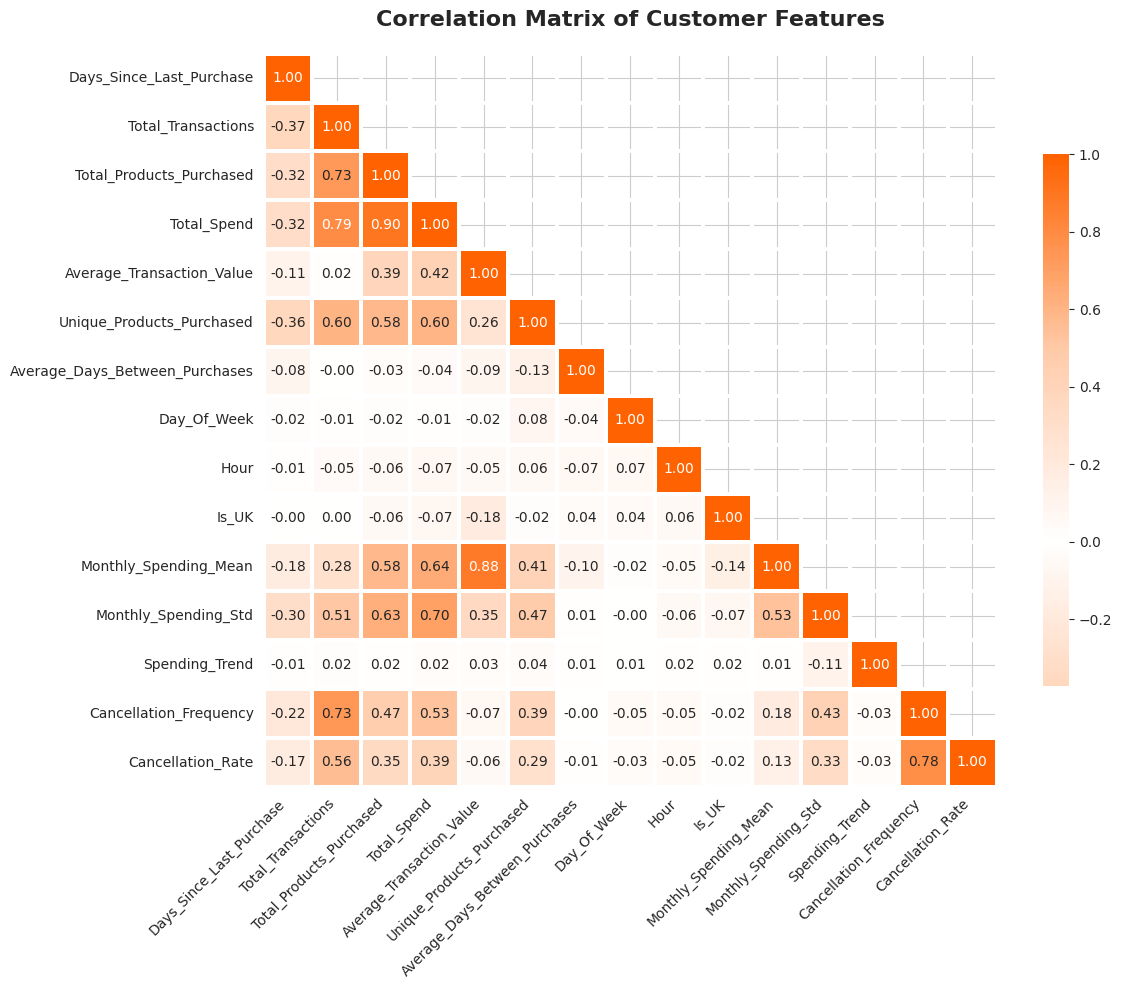

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Reset background style
sns.set_style('whitegrid')

# Step 1: Drop 'CustomerID' and calculate correlation
correlation_matrix = train_customer_data.drop(columns=['CustomerID'], errors='ignore').corr()

# Step 2: Create custom colormap similar to PDF
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
custom_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Step 3: Create mask to show only lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Step 4: Set up the plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap=custom_cmap,
    annot=True,
    fmt=".2f",
    center=0,
    linewidths=1.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": .7}
)

# Step 5: Title and layout
plt.title('Correlation Matrix of Customer Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


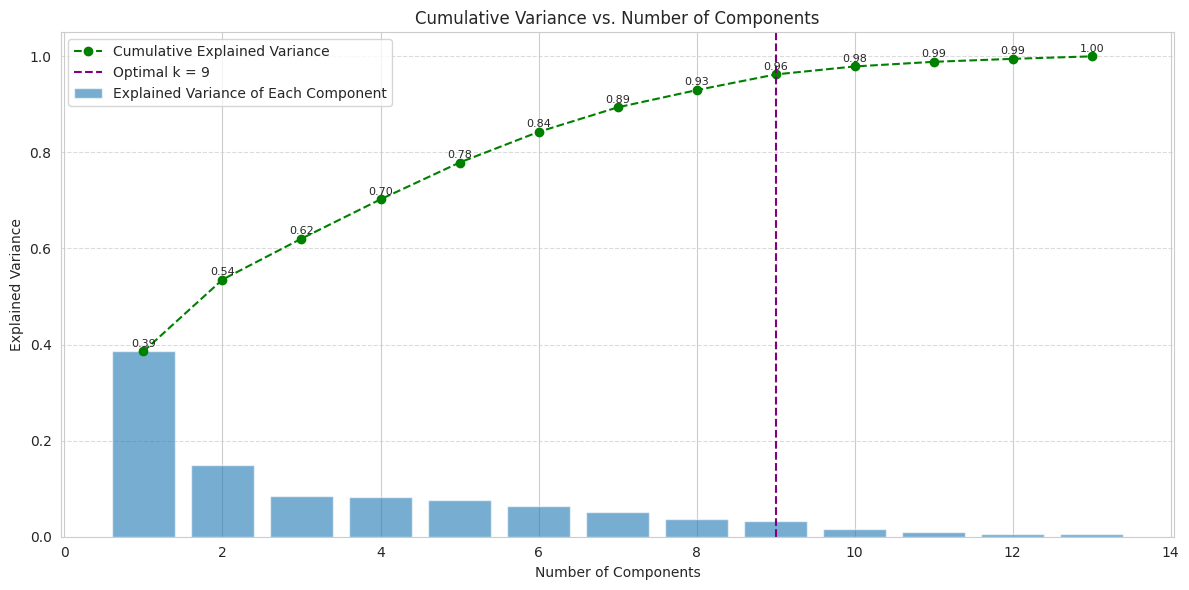

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Exclude non-numeric or unnecessary columns
exclude_columns = ['CustomerID', 'Is_UK', 'Day_Of_Week']
features = train_customer_data.drop(columns=exclude_columns)

# Handle missing values
features = features.dropna()  # Or use imputation if needed

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find optimal number of components (e.g., 95% variance)
optimal_k = np.argmax(cumulative_variance >= 0.95) + 1

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Explained Variance of Each Component')

# Add cumulative variance line
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='green', label='Cumulative Explained Variance')

# Annotate each cumulative variance point
for i, value in enumerate(cumulative_variance):
    plt.text(i + 1, value + 0.01, f"{value:.2f}", ha='center', fontsize=8)

# Draw line for optimal components
plt.axvline(x=optimal_k, linestyle='--', color='purple', label=f'Optimal k = {optimal_k}')

# Labels and legend
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Cumulative Variance vs. Number of Components')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
train_customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12352.0                        36                   8   
4     12353.0                       204                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                    0.00000   
1                      2332      1437.24                  359.31000   
2                       630      1457.55                 1457.55000   
3                       463      1265.41                  158.17625   
4                        20        89.00                   89.00000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         57                        3.132530            1   
4                          4                        0.000000            3   

   Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0    10      1                 0.0000              0.000000           0.000   
1    19      0               359.3100            203.875689        -100.884   
2     9      0              1457.5500              0.000000           0.000   
3    14      0               316.3525            134.700629           9.351   
4    17      0                89.0000              0.000000           0.000   

   Cancellation_Frequency  Cancellation_Rate  
0                     1.0                0.5  
1                     0.0                0.0  
2                     0.0                0.0  
3                     1.0                1.0  
4                     0.0                0.0

In [ ]:
#Scale all the features in train_customer_data except 'CustomerID', 'Is_UK', 'Day_Of_Week'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = train_customer_data.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = train_customer_data.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                  2.314526           -0.469312   
1     12348.0                 -0.172917           -0.041810   
2     12349.0                 -0.740054           -0.683063   
3     12352.0                 -0.560958            0.813195   
4     12353.0                  1.110603           -0.683063   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                 -0.671577    -0.682879                  -1.347182   
1                  1.462723     0.123402                   0.343715   
2                 -0.094987     0.134796                   5.511983   
3                 -0.247829     0.027007                  -0.602811   
4                 -0.653273    -0.632951                  -0.928352   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                  -0.924474                       -0.292786            1   
1                  -0.582359                        0.670063            3   
2                   0.290035                       -0.292786            0   
3                   0.033449                       -0.015684            1   
4                  -0.873157                       -0.292786            3   

       Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  \
0 -1.070664      1              -1.284250             -0.678488   
1  2.818875      0              -0.002077              0.385052   
2 -1.502835      0               3.916918             -0.678488   
3  0.658020      0              -0.155368              0.024192   
4  1.954533      0              -0.966660             -0.678488   

   Spending_Trend  Cancellation_Frequency  Cancellation_Rate  
0        0.080707                0.273583           0.197211  
1       -0.563884               -0.500456          -0.380015  
2        0.080707               -0.500456          -0.380015  
3        0.140455                0.273583           0.774438  
4        0.080707               -0.500456          -0.380015

In [ ]:
customer_data_scaled.isnull().sum()

CustomerID                         0
Days_Since_Last_Purchase           0
Total_Transactions                 0
Total_Products_Purchased           0
Total_Spend                        0
Average_Transaction_Value          0
Unique_Products_Purchased          0
Average_Days_Between_Purchases    63
Day_Of_Week                        0
Hour                               0
Is_UK                              0
Monthly_Spending_Mean              0
Monthly_Spending_Std               0
Spending_Trend                     0
Cancellation_Frequency             0
Cancellation_Rate                  0
dtype: int64

In [ ]:
#Drop null values
customer_data_scaled.dropna(inplace=True)

In [ ]:
customer_data_scaled.set_index('CustomerID', inplace=True)

In [ ]:
# Creating a PCA object with 9 components
pca = PCA(n_components=9)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled.copy())

# Creating a new dataframe from the PCA dataframe, with columns labeled Feature_1, Feature_2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['Feature_'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index
customer_data_pca.head()

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
CustomerID                                                                     
12346.0     -2.117837  -1.755955  -1.392489  -0.320538  -1.041577   1.724389   
12348.0      0.255821   0.563089   0.589102   0.952657   0.273609  -2.207184   
12349.0      1.834477  -2.552836   5.606633  -0.895580  -0.240755   1.182230   
12352.0      0.470210  -1.504945  -1.073964   0.662529   0.218138  -0.405845   
12353.0     -2.298641   0.447065  -0.509222   1.429832  -0.304469  -0.537912   

            Feature_7  Feature_8  Feature_9  
CustomerID                                   
12346.0      0.352557   1.171113  -0.005546  
12348.0      1.606250   0.607356  -0.831041  
12349.0      0.213721  -2.846661   1.799853  
12352.0      0.100449  -0.380179  -0.105491  
12353.0      1.141329   0.633269  -0.461251

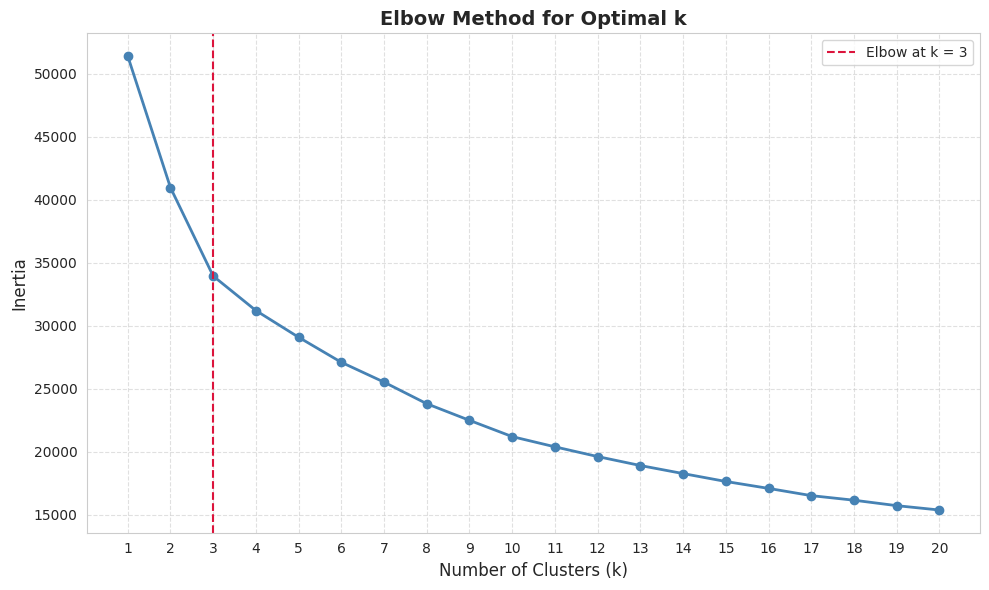

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Compute inertia for k from 1 to 20
inertia = []
k_values = range(1, 21)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(customer_data_pca)
    inertia.append(kmeans.inertia_)

# Step 2: Set your preferred elbow point (manually)
elbow_k = 3  # Change this based on visual inspection if needed

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='steelblue', linewidth=2)
plt.axvline(x=elbow_k, linestyle='--', color='crimson', linewidth=1.5, label=f'Elbow at k = {elbow_k}')

# Labels and formatting
plt.title('Elbow Method for Optimal k', fontsize=14, weight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


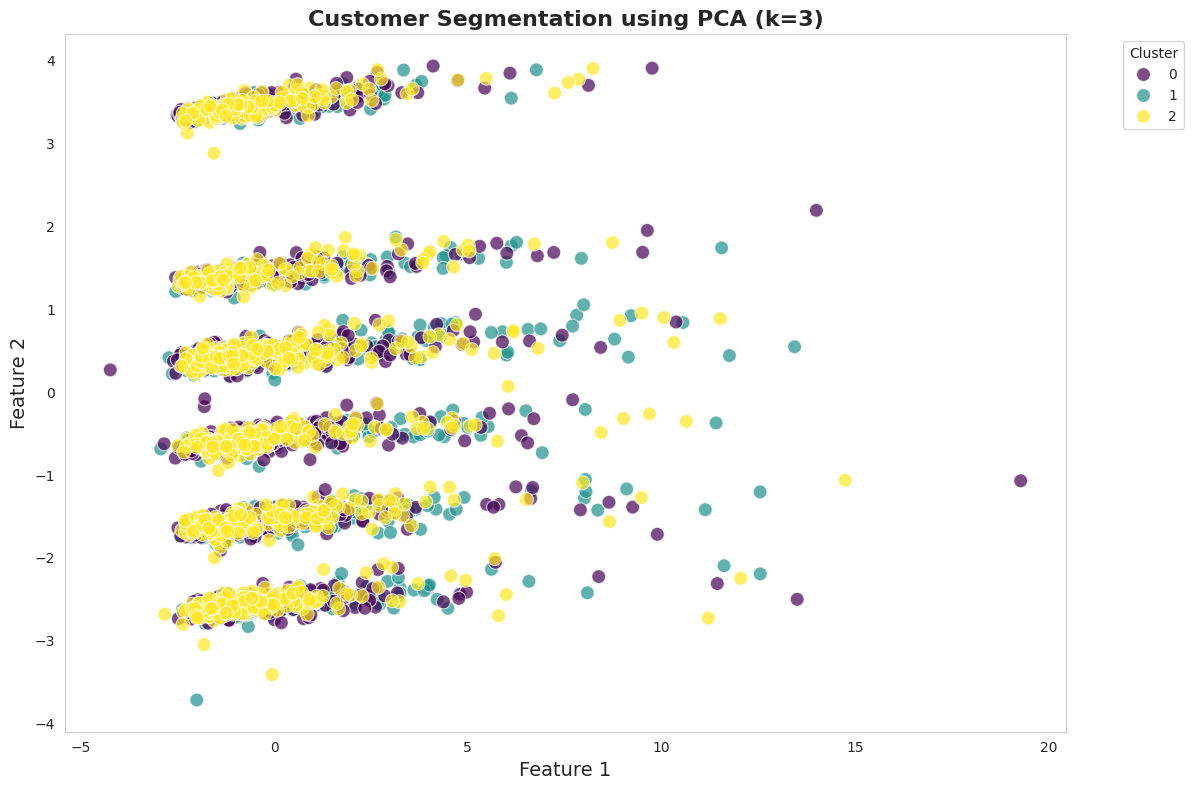

In [ ]:
# Copy the PCA features
customer_data_clusters = customer_data_pca.copy()

# Apply KMeans clustering with 3 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=35, n_init='auto', init='k-means++')
customer_data_clusters['Cluster'] = kmeans.fit_predict(customer_data_clusters)

# Scatterplot using Feature_1 and Feature_2
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Feature_1',
    y='Feature_2',
    hue='Cluster',
    data=customer_data_clusters,
    palette='viridis',
    s=100,
    alpha=0.7
)

plt.title('Customer Segmentation using PCA (k=3)', fontsize=16, weight='bold')
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()



/tmp/ipython-input-264-1506955510.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



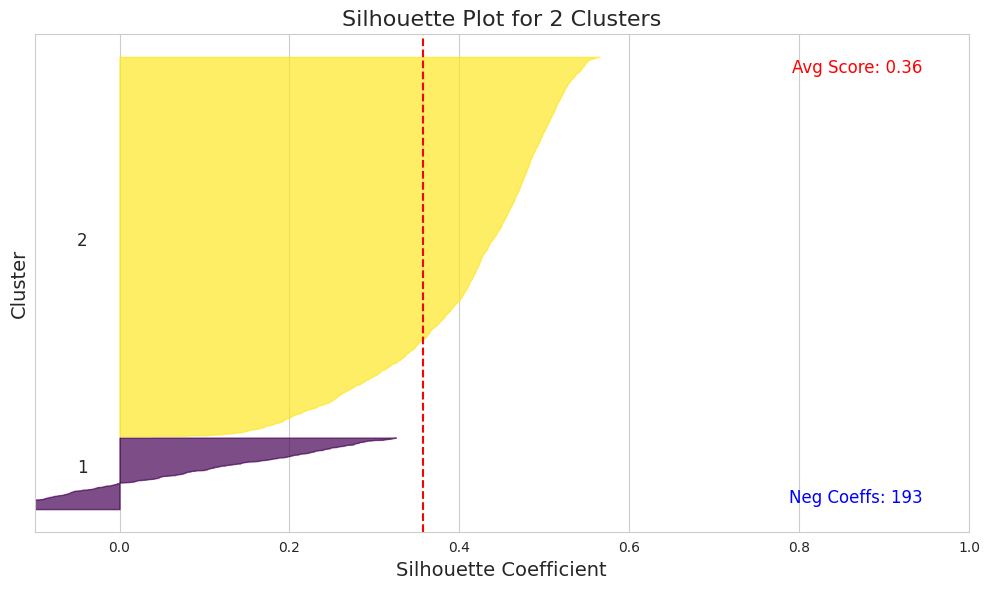

/tmp/ipython-input-264-1506955510.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



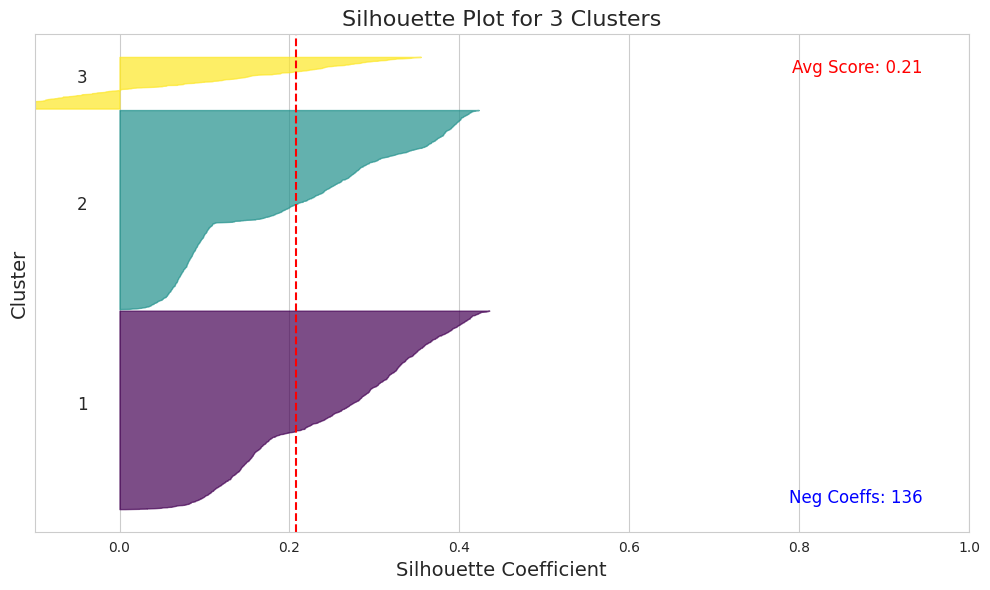

/tmp/ipython-input-264-1506955510.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



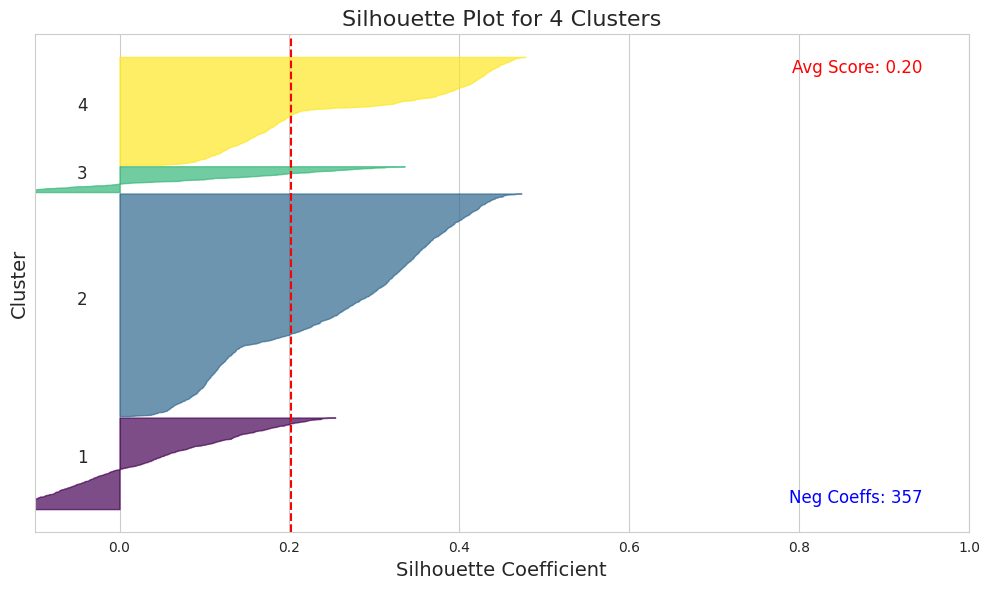

/tmp/ipython-input-264-1506955510.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



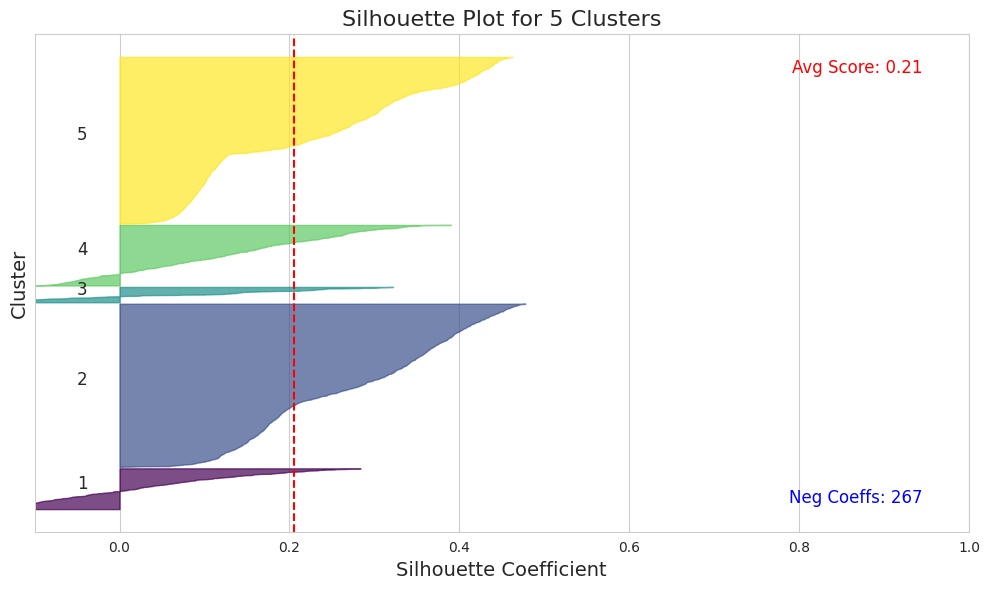

/tmp/ipython-input-264-1506955510.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



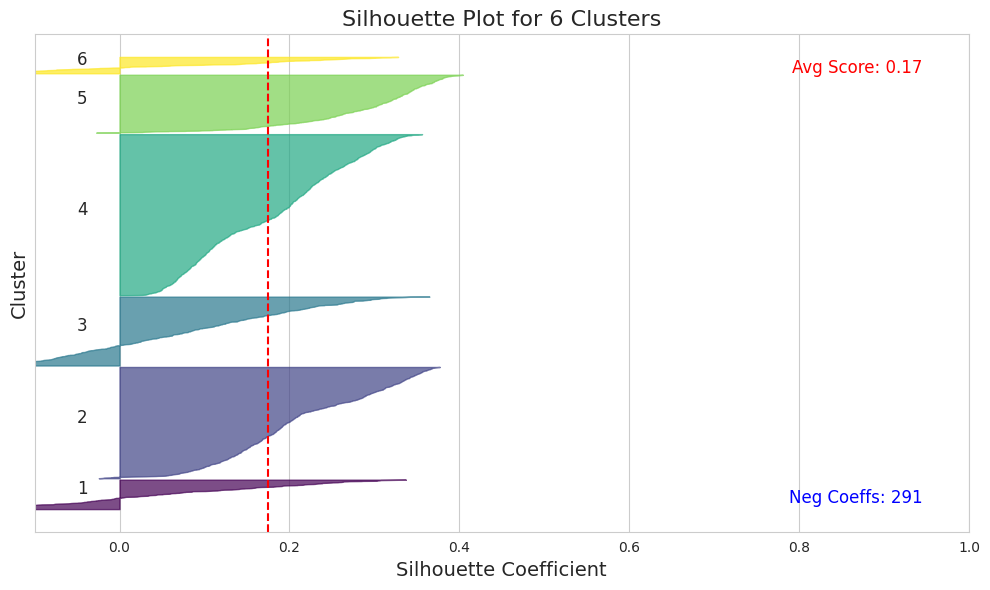

/tmp/ipython-input-264-1506955510.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



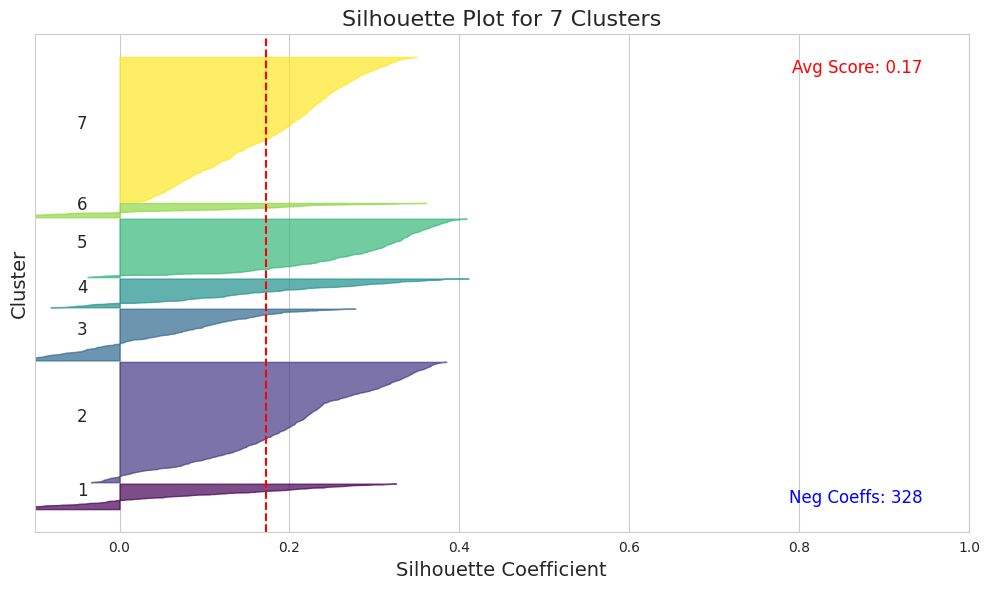

/tmp/ipython-input-264-1506955510.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



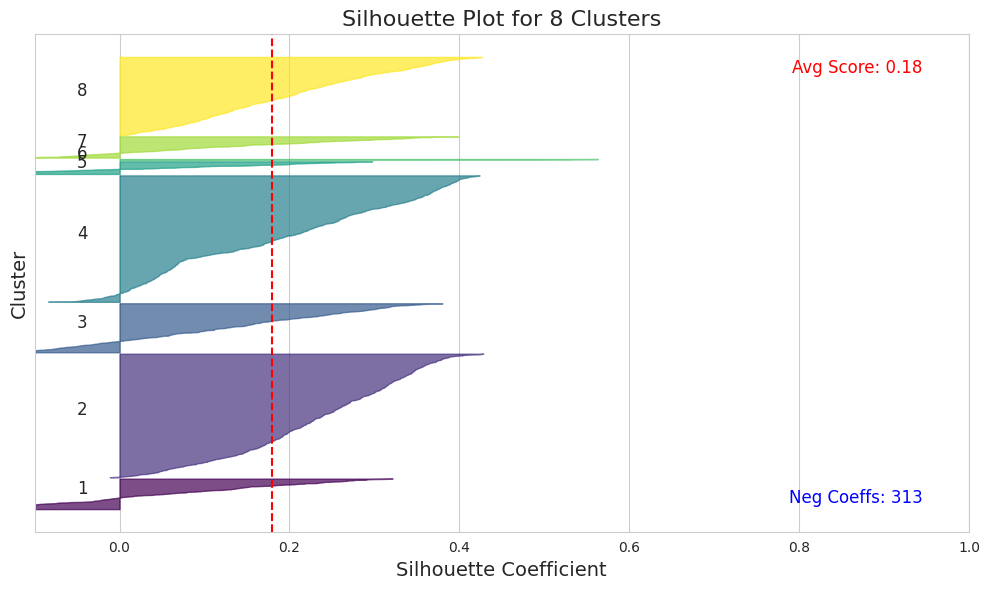

/tmp/ipython-input-264-1506955510.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



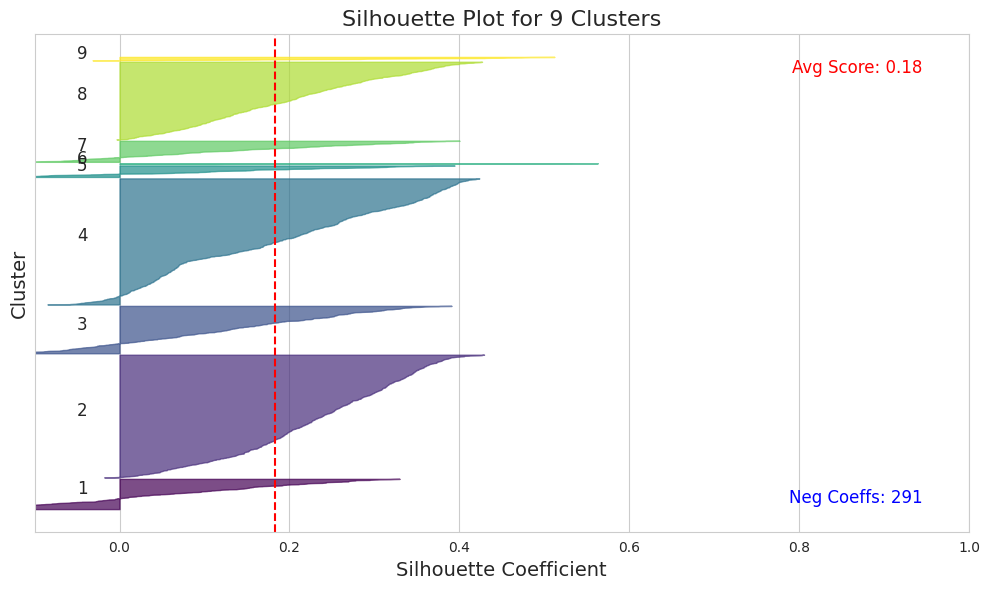

/tmp/ipython-input-264-1506955510.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



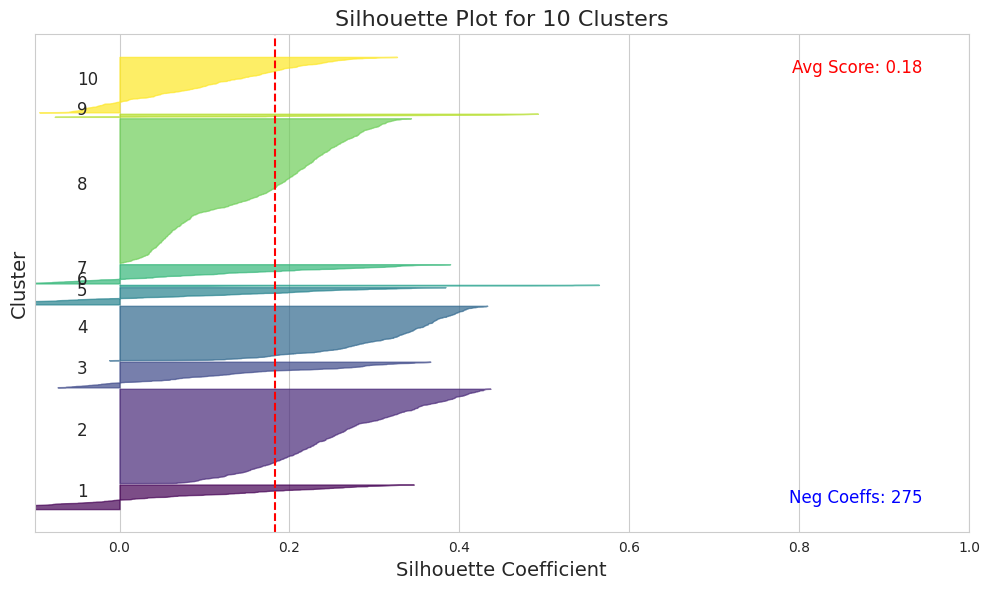

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
customer_data_silhouette = customer_data_pca.copy()
def plot_silhouette(X, n_clusters):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim([-0.1, 1])

    kmeans = KMeans(n_clusters=n_clusters, random_state=35, n_init='auto', init='k-means++')
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    cmap = cm.get_cmap("viridis", n_clusters)

    for i in range(n_clusters):
        ith_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_silhouette_values.sort()
        size_cluster_i = ith_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(i / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, (y_lower + y_upper) / 2, str(i + 1), fontsize=12)
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color='red', linestyle='--')
    ax.set_title(f'Silhouette Plot for {n_clusters} Clusters', fontsize=16)
    ax.set_xlabel('Silhouette Coefficient', fontsize=14)
    ax.set_ylabel('Cluster', fontsize=14)

    ax.text(0.95, 0.95, f'Avg Score: {silhouette_avg:.2f}', transform=ax.transAxes,
            fontsize=12, va='top', ha='right', color='red')

    ax.text(0.95, 0.05, f'Neg Coeffs: {np.sum(sample_silhouette_values < 0)}',
            transform=ax.transAxes, fontsize=12, va='bottom', ha='right', color='blue')

    ax.set_yticks([])
    plt.tight_layout()
    plt.show()

# Run for k = 2 to 10
for n_clusters in range(2, 11):
    plot_silhouette(customer_data_silhouette, n_clusters)

In [ ]:
from collections import Counter
import numpy as np

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=35, n_init='auto', init='k-means++')
labels = kmeans.fit_predict(customer_data_clusters.drop(columns=['Cluster'], errors='ignore'))

# Sort cluster labels by size (optional)
freq = Counter(labels)
label_map = {old: new for new, (old, _) in enumerate(freq.most_common())}
remapped_labels = np.array([label_map[l] for l in labels])

# Assign
customer_data_clusters['Cluster'] = remapped_labels


In [ ]:
#Reset index for customer_data_pca
customer_data_pca.reset_index(inplace=True)
customer_data_pca.head()

CustomerID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0     12346.0  -2.117837  -1.755955  -1.392489  -0.320538  -1.041577   
1     12348.0   0.255821   0.563089   0.589102   0.952657   0.273609   
2     12349.0   1.834477  -2.552836   5.606633  -0.895580  -0.240755   
3     12352.0   0.470210  -1.504945  -1.073964   0.662529   0.218138   
4     12353.0  -2.298641   0.447065  -0.509222   1.429832  -0.304469   

   Feature_6  Feature_7  Feature_8  Feature_9  
0   1.724389   0.352557   1.171113  -0.005546  
1  -2.207184   1.606250   0.607356  -0.831041  
2   1.182230   0.213721  -2.846661   1.799853  
3  -0.405845   0.100449  -0.380179  -0.105491  
4  -0.537912   1.141329   0.633269  -0.461251

In [ ]:
 # Step 1: Align both datasets by index
# Only keep rows in train_customer_data that were used in PCA (same as features used)
customer_data_cleaned = train_customer_data.loc[customer_data_pca.index].copy()

# Step 2: Add the cluster labels
customer_data_cleaned['Cluster'] = customer_data_clusters['Cluster'].values

# Step 3: Preview the final result
customer_data_cleaned.head()


CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12352.0                        36                   8   
4     12353.0                       204                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                    0.00000   
1                      2332      1437.24                  359.31000   
2                       630      1457.55                 1457.55000   
3                       463      1265.41                  158.17625   
4                        20        89.00                   89.00000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         57                        3.132530            1   
4                          4                        0.000000            3   

   Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0    10      1                 0.0000              0.000000           0.000   
1    19      0               359.3100            203.875689        -100.884   
2     9      0              1457.5500              0.000000           0.000   
3    14      0               316.3525            134.700629           9.351   
4    17      0                89.0000              0.000000           0.000   

   Cancellation_Frequency  Cancellation_Rate  Cluster  
0                     1.0                0.5        1  
1                     0.0                0.0        0  
2                     0.0                0.0        1  
3                     1.0                1.0        1  
4                     0.0                0.0        0

In [ ]:
# # Already used this earlier:
# features = train_customer_data.drop(columns=['CustomerID', 'Is_UK', 'Day_Of_Week'])
# features = features.dropna()  # Drop rows with missing values

# # Keep the corresponding CustomerIDs only
# customer_ids = train_customer_data.loc[features.index, 'CustomerID']

# # After clustering, add those back
# customer_data_clusters['CustomerID'] = customer_ids.values

In [ ]:
import plotly.graph_objects as go

# Ensure CustomerID is added (only if needed)
customer_data_clusters['CustomerID'] = customer_ids.values

# Define custom cluster colors for 4 clusters
colors = ['#e8000b', '#1ac938', '#023eff', '#ff7f0e']  # Red, Green, Blue, Orange

# Create 3D scatter plot
fig = go.Figure()

# Add each cluster as a separate trace
for i, color in enumerate(colors):
    cluster_data = customer_data_clusters[customer_data_clusters['Cluster'] == i]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Feature_1'],
        y=cluster_data['Feature_2'],
        z=cluster_data['Feature_3'],
        mode='markers',
        marker=dict(color=color, size=5, opacity=0.4),
        name=f'Cluster {i}'
    ))

# Update plot layout
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(title='Feature_1', backgroundcolor="#fcf0dc", gridcolor='white'),
        yaxis=dict(title='Feature_2', backgroundcolor="#fcf0dc", gridcolor='white'),
        zaxis=dict(title='Feature_3', backgroundcolor="#fcf0dc", gridcolor='white')
    ),
    width=900,
    height=800
)

# Show plot
fig.show()


/tmp/ipython-input-273-3689879840.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




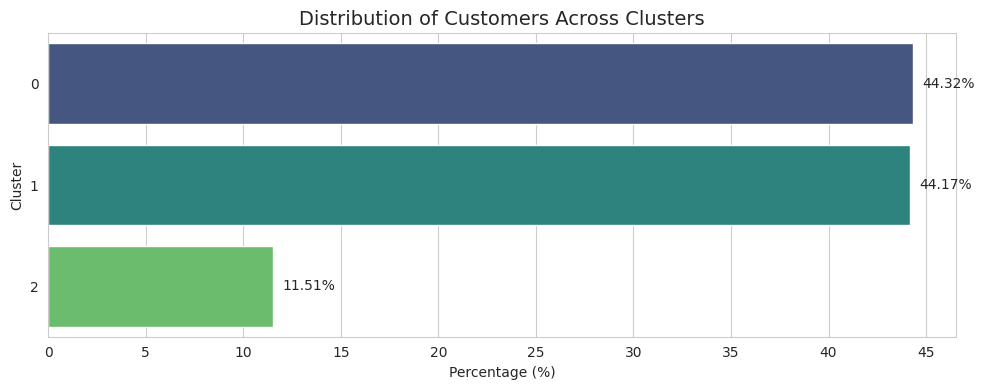

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_clusters['Cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Define a color palette (optional - can customize)
colors = sns.color_palette('viridis', len(cluster_percentage))

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', fontsize=10)

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Cluster')

# Show the plot
plt.tight_layout()
plt.show()

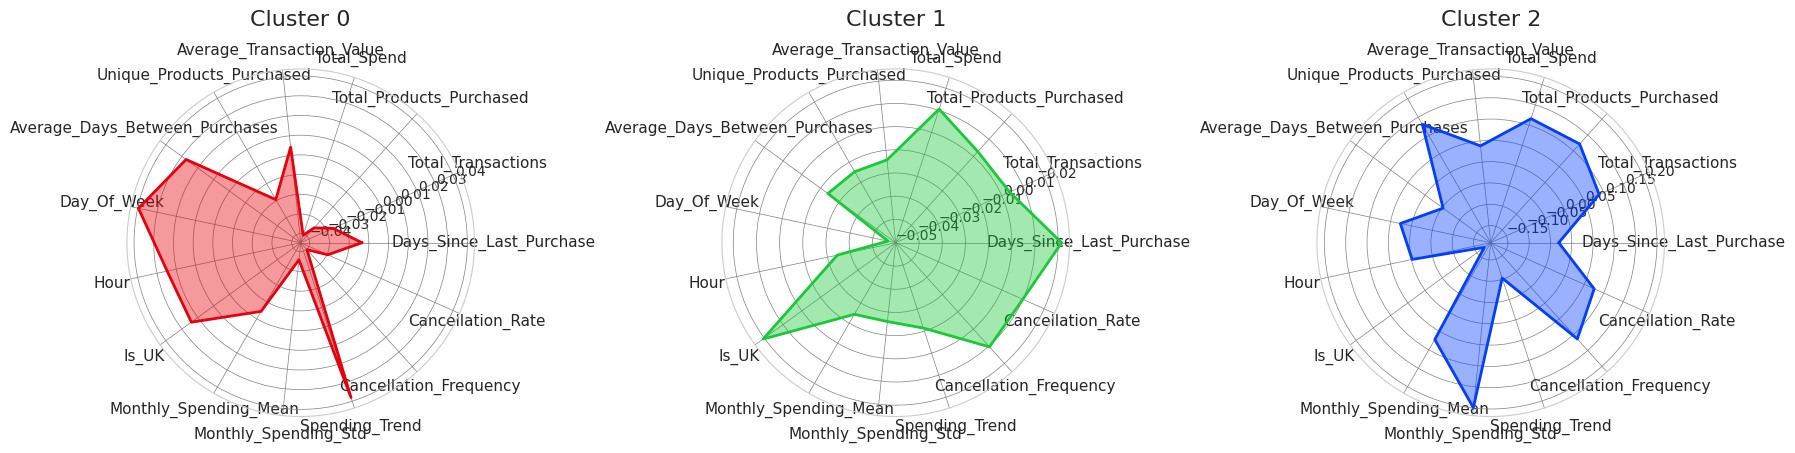

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Drop 'CustomerID' and 'Cluster', and standardize
X = customer_data_cleaned.drop(columns=['CustomerID', 'Cluster'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Create standardized DataFrame and add 'Cluster' back
df_customer_standardized = pd.DataFrame(X_scaled, columns=X.columns, index=customer_data_cleaned.index)
df_customer_standardized['Cluster'] = customer_data_cleaned['Cluster'].values

# Step 3: Compute cluster centroids
cluster_centroids = df_customer_standardized.groupby('Cluster').mean()

# Step 4: Prepare radar chart settings
labels = cluster_centroids.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
labels = list(labels) + [labels[0]]

# Step 5: Plot radar chart for each cluster
n_clusters = cluster_centroids.shape[0]
fig, axes = plt.subplots(1, n_clusters, figsize=(6 * n_clusters, 6), subplot_kw=dict(polar=True))

# Handle case when there's only 1 cluster
if n_clusters == 1:
    axes = [axes]

# Define color palette (extend if more clusters)
colors = ['#e8000b', '#1ac938', '#023eff']

for i in range(n_clusters):
    data = cluster_centroids.iloc[i].tolist()
    data += data[:1]
    ax = axes[i]
    ax.fill(angles, data, color=colors[i % len(colors)], alpha=0.4)
    ax.plot(angles, data, color=colors[i % len(colors)], linewidth=2)
    ax.set_title(f'Cluster {i}', size=16, y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1], fontsize=11)
    ax.grid(color='grey', linewidth=0.5)

plt.tight_layout()
plt.show()

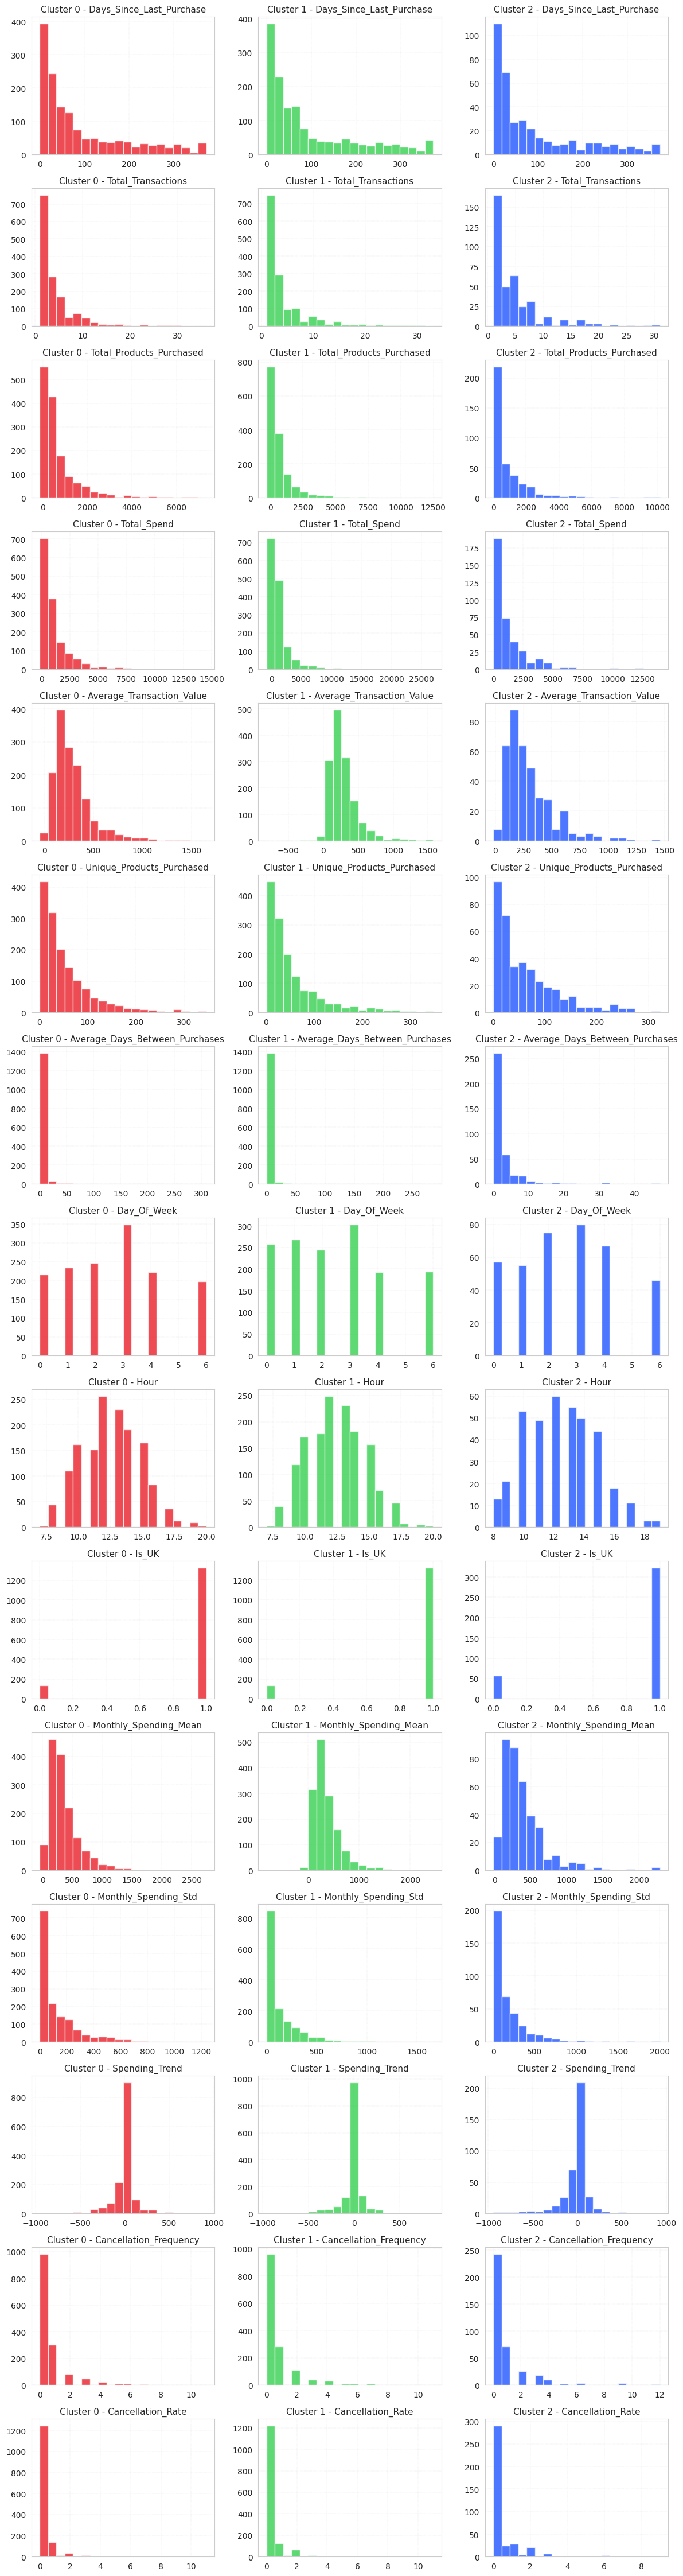

In [ ]:
import matplotlib.pyplot as plt

# --- Step 1: Define features and clusters
features = customer_data_cleaned.drop(columns=['CustomerID', 'Cluster']).columns
clusters = sorted(customer_data_cleaned['Cluster'].unique())

# --- Step 2: Create subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))

# --- Step 3: Plot histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        ax = axes[i, j] if n_rows > 1 else axes[j]
        data = customer_data_cleaned[customer_data_cleaned['Cluster'] == cluster][feature]
        ax.hist(data, bins=20, color=colors[j % len(colors)], edgecolor='white', alpha=0.7)
        ax.set_title(f'Cluster {cluster} - {feature}', fontsize=11)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.grid(True, linestyle='--', linewidth=0.3, alpha=0.5)

# --- Step 4: Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = customer_data_clusters.drop(columns=['Cluster', 'CustomerID'])  # Features
labels = customer_data_clusters['Cluster']                          # Cluster labels

print("Silhouette Score:", silhouette_score(X, labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X, labels))
print("Davies-Bouldin Score:", davies_bouldin_score(X, labels))

Silhouette Score: 0.207992857201023
Calinski-Harabasz Score: 847.7329714895935
Davies-Bouldin Score: 1.515917059970733


In [ ]:
# Step 1: Keep only transactions for training customers
train_ids = train_customer_data['CustomerID'].astype(float).unique()
df_train = df[df['CustomerID'].isin(train_ids)]

In [ ]:
customer_data_clusters.drop(columns=['CustomerID'], inplace=True)

In [ ]:
#Reset index for customer_data_clusters
customer_data_clusters.reset_index(inplace=True)
customer_data_clusters.head()

CustomerID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0     12346.0  -2.117837  -1.755955  -1.392489  -0.320538  -1.041577   
1     12348.0   0.255821   0.563089   0.589102   0.952657   0.273609   
2     12349.0   1.834477  -2.552836   5.606633  -0.895580  -0.240755   
3     12352.0   0.470210  -1.504945  -1.073964   0.662529   0.218138   
4     12353.0  -2.298641   0.447065  -0.509222   1.429832  -0.304469   

   Feature_6  Feature_7  Feature_8  Feature_9  Cluster  
0   1.724389   0.352557   1.171113  -0.005546        1  
1  -2.207184   1.606250   0.607356  -0.831041        0  
2   1.182230   0.213721  -2.846661   1.799853        1  
3  -0.405845   0.100449  -0.380179  -0.105491        1  
4  -0.537912   1.141329   0.633269  -0.461251        0

In [ ]:
# Merge cluster info to train_customer_data using CustomerID
train_customer_data = train_customer_data.merge(
    customer_data_clusters[['CustomerID', 'Cluster']],
    on='CustomerID',
    how='left'
)
train_customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12348.0                        75                   4   
2     12349.0                        18                   1   
3     12352.0                        36                   8   
4     12353.0                       204                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                    0.00000   
1                      2332      1437.24                  359.31000   
2                       630      1457.55                 1457.55000   
3                       463      1265.41                  158.17625   
4                        20        89.00                   89.00000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                         21                       10.884615            3   
2                         72                        0.000000            0   
3                         57                        3.132530            1   
4                          4                        0.000000            3   

   Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0    10      1                 0.0000              0.000000           0.000   
1    19      0               359.3100            203.875689        -100.884   
2     9      0              1457.5500              0.000000           0.000   
3    14      0               316.3525            134.700629           9.351   
4    17      0                89.0000              0.000000           0.000   

   Cancellation_Frequency  Cancellation_Rate  Cluster  
0                     1.0                0.5      1.0  
1                     0.0                0.0      0.0  
2                     0.0                0.0      1.0  
3                     1.0                1.0      1.0  
4                     0.0                0.0      0.0

In [ ]:
# Merge transaction data with cluster information
df_train_clustered = df_train.merge(
    train_customer_data[['CustomerID', 'Cluster']],
    on='CustomerID',
    how='inner'
)

In [ ]:
# Group by Cluster, StockCode, Description and sum the quantities
top_products = (
    df_train_clustered
    .groupby(['Cluster', 'StockCode', 'Description'])['Quantity']
    .sum()
    .reset_index()
    .sort_values(by=['Cluster', 'Quantity'], ascending=[True, False])
)

# Get top 10 products per cluster
top_10_per_cluster = top_products.groupby('Cluster').head(10)
top_10_per_cluster.head(40)  # Optional: View some rows


Cluster StockCode                          Description  Quantity
2772      0.0     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      6232
2980      0.0     84879        ASSORTED COLOUR BIRD ORNAMENT      4353
12        0.0     15036            ASSORTED COLOURS SILK FAN      4184
3150      0.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER      3907
3135      0.0    85099B              JUMBO BAG RED RETROSPOT      3581
992       0.0     22151            PLACE SETTING WHITE HEART      3478
384       0.0     21212      PACK OF 72 RETROSPOT CAKE CASES      3262
1301      0.0     22492              MINI PAINT SET VINTAGE       3204
1014      0.0     22178      VICTORIAN GLASS HANGING T-LIGHT      2938
2137      0.0     23310              BUBBLEGUM RING ASSORTED      2772
6184      1.0     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      5919
6395      1.0     84879        ASSORTED COLOUR BIRD ORNAMENT      5631
3513      1.0     18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      5587
6545      1.0    85099B              JUMBO BAG RED RETROSPOT      4946
6559      1.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER      4916
3486      1.0     17003                  BROCADE RING PURSE       4185
3806      1.0     21212      PACK OF 72 RETROSPOT CAKE CASES      4027
6028      1.0     62018                            SOMBRERO       3699
3449      1.0     16014          SMALL CHINESE STYLE SCISSOR      3643
6333      1.0     84755  COLOUR GLASS T-LIGHT HOLDER HANGING      3577
8253      2.0     22616           PACK OF 12 LONDON TISSUES      13641
9934      2.0    85099B              JUMBO BAG RED RETROSPOT     10039
9790      2.0     84879        ASSORTED COLOUR BIRD ORNAMENT      9050
9594      2.0     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      7782
7845      2.0     22178      VICTORIAN GLASS HANGING T-LIGHT      7757
9947      2.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER      6488
8636      2.0     22998         TRAVEL CARD WALLET KEEP CALM      6405
7234      2.0     21212      PACK OF 72 RETROSPOT CAKE CASES      5631
7822      2.0     22151            PLACE SETTING WHITE HEART      5492
8731      2.0     23084                   RABBIT NIGHT LIGHT      5275

In [ ]:
# Summarize which customer bought what (with quantity) in which cluster
customer_purchase_history = (
    df_train_clustered
    .groupby(['CustomerID', 'Cluster', 'StockCode'])['Quantity']
    .sum()
    .reset_index()
)


In [ ]:
# Step: Compute top 10 best-selling products per cluster
best_selling_products = df_train_clustered.groupby(['Cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['Cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('Cluster').head(10)


In [ ]:
# Step: Track which products each customer has purchased
customer_purchases = df_train_clustered.groupby(['CustomerID', 'Cluster', 'StockCode'])['Quantity'].sum().reset_index()



In [ ]:
recommendations = []

# Loop through each cluster
for cluster in top_products_per_cluster['Cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['Cluster'] == cluster]
    customers_in_cluster = train_customer_data[train_customer_data['Cluster'] == cluster]['CustomerID']

    for customer in customers_in_cluster:
        # Products already bought by the customer
        purchased = customer_purchases[
            (customer_purchases['CustomerID'] == customer) &
            (customer_purchases['Cluster'] == cluster)
        ]['StockCode'].tolist()

        # Recommend top 3 products not purchased yet
        not_purchased = top_products[~top_products['StockCode'].isin(purchased)].head(3)

        recs = not_purchased[['StockCode', 'Description']].values.flatten().tolist()
        recs = recs + [None] * (6 - len(recs))  # Pad if less than 3 recommendations
        recommendations.append([customer, cluster] + recs)

# Create DataFrame
recommendations_df = pd.DataFrame(recommendations, columns=[
    'CustomerID', 'Cluster',
    'Rec1_StockCode', 'Rec1_Description',
    'Rec2_StockCode', 'Rec2_Description',
    'Rec3_StockCode', 'Rec3_Description'
])


In [ ]:
# Merge the recommendations with the customer data
customer_data_with_recommendations = train_customer_data.merge(
    recommendations_df, on=['CustomerID', 'Cluster'], how='left'
)

# Preview a few rows
customer_data_with_recommendations[
    ['CustomerID', 'Cluster',
     'Rec1_Description', 'Rec2_Description', 'Rec3_Description']
].sample(10, random_state=42)

CustomerID  Cluster                   Rec1_Description  \
1116     14299.0      2.0         PACK OF 12 LONDON TISSUES    
2357     16483.0      1.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
807      13740.0      1.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
2859     17379.0      1.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
196      12648.0      0.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
2627     16952.0      1.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
2304     16395.0      0.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
1805     15539.0      0.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
2563     16842.0      0.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
2008     15866.0      1.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   

                   Rec2_Description                     Rec3_Description  
1116        JUMBO BAG RED RETROSPOT      VICTORIAN GLASS HANGING T-LIGHT  
2357  ASSORTED COLOUR BIRD ORNAMENT  ESSENTIAL BALM 3.5g TIN IN ENVELOPE  
807   ASSORTED COLOUR BIRD ORNAMENT  ESSENTIAL BALM 3.5g TIN IN ENVELOPE  
2859  ASSORTED COLOUR BIRD ORNAMENT  ESSENTIAL BALM 3.5g TIN IN ENVELOPE  
196   ASSORTED COLOUR BIRD ORNAMENT            ASSORTED COLOURS SILK FAN  
2627  ASSORTED COLOUR BIRD ORNAMENT  ESSENTIAL BALM 3.5g TIN IN ENVELOPE  
2304  ASSORTED COLOUR BIRD ORNAMENT            ASSORTED COLOURS SILK FAN  
1805  ASSORTED COLOUR BIRD ORNAMENT            ASSORTED COLOURS SILK FAN  
2563      ASSORTED COLOURS SILK FAN   WHITE HANGING HEART T-LIGHT HOLDER  
2008  ASSORTED COLOUR BIRD ORNAMENT  ESSENTIAL BALM 3.5g TIN IN ENVELOPE

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

  Transaction_Status  TotalPrice  Hour  Revenue  DayOfWeek  InvoiceDay  \
0          Completed       15.30     8    15.30  Wednesday  2010-12-01   
1          Completed       20.34     8    20.34  Wednesday  2010-12-01   
2          Completed       22.00     8    22.00  Wednesday  2010-12-01   
3          Completed       20.34     8    20.34  Wednesday  2010-12-01   
4          Completed       20.34     8    20.34  Wednesday  2010-12-01   

   Total_Spend  
0        15.30  
1        20.34  
2        22.00  
3        20.34  
4        20.34

In [ ]:
test_df.head()

InvoiceNo StockCode                          Description  Quantity  \
10362    537626     85116      BLACK CANDELABRA T-LIGHT HOLDER        12   
10363    537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
10364    537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
10365    537626     22492              MINI PAINT SET VINTAGE         36   
10366    537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   

              InvoiceDate  UnitPrice  CustomerID  Country Transaction_Status  \
10362 2010-12-07 14:57:00       2.10     12347.0  Iceland          Completed   
10363 2010-12-07 14:57:00       4.25     12347.0  Iceland          Completed   
10364 2010-12-07 14:57:00       3.25     12347.0  Iceland          Completed   
10365 2010-12-07 14:57:00       0.65     12347.0  Iceland          Completed   
10366 2010-12-07 14:57:00       1.25     12347.0  Iceland          Completed   

       TotalPrice  Hour  Revenue DayOfWeek  InvoiceDay  Total_Spend  
10362        25.2    14     25.2   Tuesday  2010-12-07         25.2  
10363        17.0    14     17.0   Tuesday  2010-12-07         17.0  
10364        39.0    14     39.0   Tuesday  2010-12-07         39.0  
10365        23.4    14     23.4   Tuesday  2010-12-07         23.4  
10366        15.0    14     15.0   Tuesday  2010-12-07         15.0

In [ ]:
test_df.nunique()

InvoiceNo             4643
StockCode             3312
Description           3463
Quantity               226
InvoiceDate           4528
UnitPrice              202
CustomerID             873
Country                 25
Transaction_Status       2
TotalPrice            2088
Hour                    15
Revenue               2088
DayOfWeek                6
InvoiceDay             305
Total_Spend           2088
dtype: int64

In [ ]:
customer_data_clusters.head()

CustomerID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0     12346.0  -2.117837  -1.755955  -1.392489  -0.320538  -1.041577   
1     12348.0   0.255821   0.563089   0.589102   0.952657   0.273609   
2     12349.0   1.834477  -2.552836   5.606633  -0.895580  -0.240755   
3     12352.0   0.470210  -1.504945  -1.073964   0.662529   0.218138   
4     12353.0  -2.298641   0.447065  -0.509222   1.429832  -0.304469   

   Feature_6  Feature_7  Feature_8  Feature_9  Cluster  
0   1.724389   0.352557   1.171113  -0.005546        1  
1  -2.207184   1.606250   0.607356  -0.831041        0  
2   1.182230   0.213721  -2.846661   1.799853        1  
3  -0.405845   0.100449  -0.380179  -0.105491        1  
4  -0.537912   1.141329   0.633269  -0.461251        0

In [ ]:
# Set CustomerID as the index
customer_data_clusters.set_index('CustomerID', inplace=True)

# Rename the index to 'Customer_ID'
customer_data_clusters.index.rename('Customer_ID', inplace=True)

# Display the updated DataFrame
customer_data_clusters.head()

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
Customer_ID                                                                     
12346.0      -2.117837  -1.755955  -1.392489  -0.320538  -1.041577   1.724389   
12348.0       0.255821   0.563089   0.589102   0.952657   0.273609  -2.207184   
12349.0       1.834477  -2.552836   5.606633  -0.895580  -0.240755   1.182230   
12352.0       0.470210  -1.504945  -1.073964   0.662529   0.218138  -0.405845   
12353.0      -2.298641   0.447065  -0.509222   1.429832  -0.304469  -0.537912   

             Feature_7  Feature_8  Feature_9  Cluster  
Customer_ID                                            
12346.0       0.352557   1.171113  -0.005546        1  
12348.0       1.606250   0.607356  -0.831041        0  
12349.0       0.213721  -2.846661   1.799853        1  
12352.0       0.100449  -0.380179  -0.105491        1  
12353.0       1.141329   0.633269  -0.461251        0

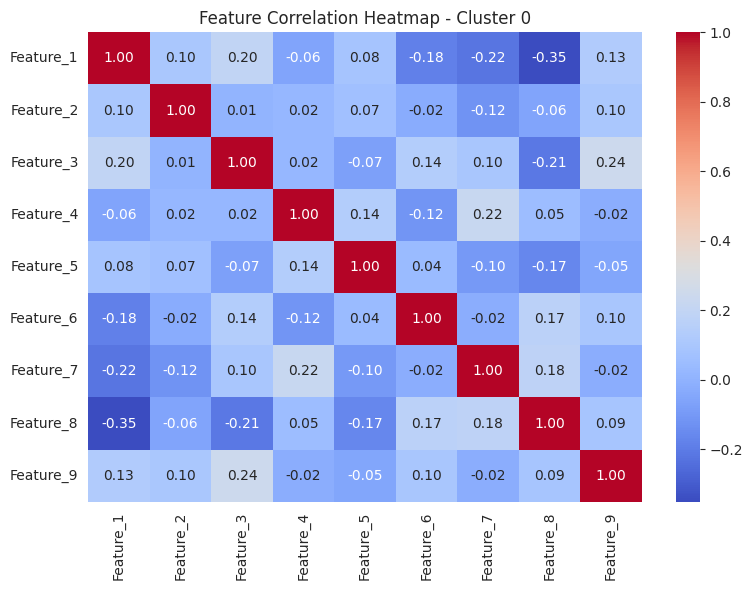

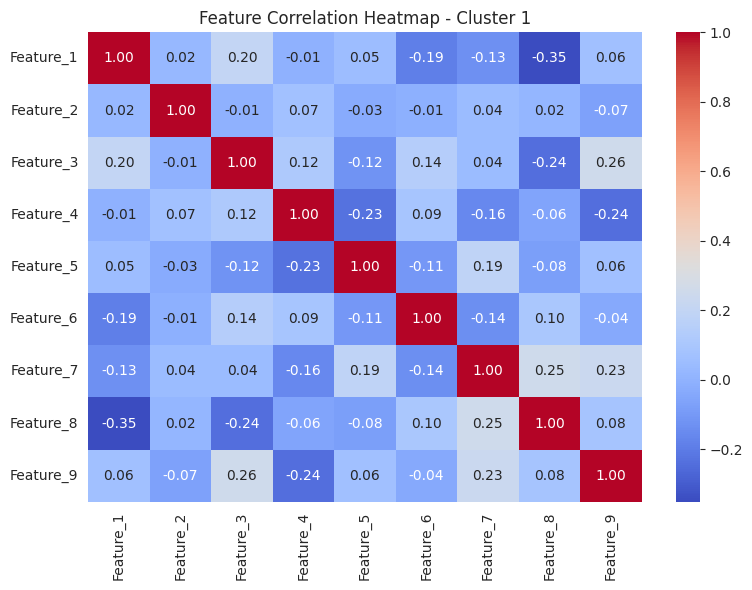

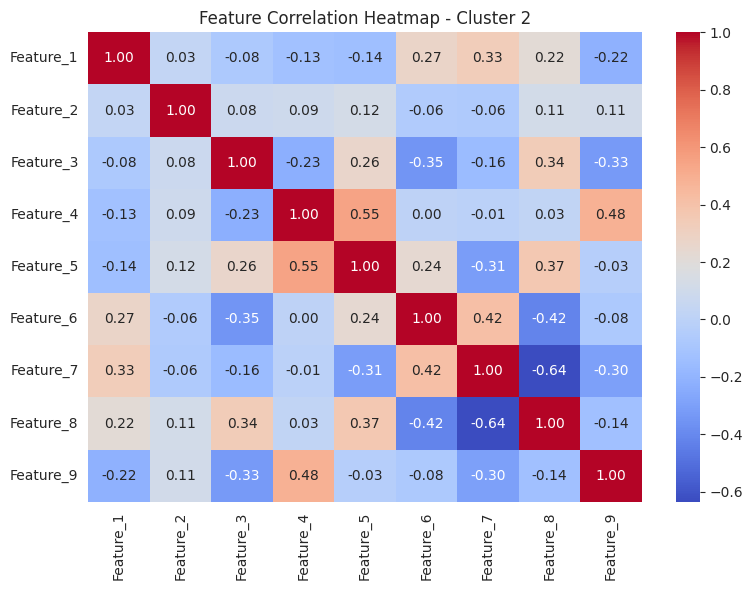

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for cluster in sorted(customer_data_clusters['Cluster'].unique()):
    subset = customer_data_clusters[customer_data_clusters['Cluster'] == cluster]
    corr = subset.drop(columns=['CustomerID', 'Cluster'], errors='ignore').corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title(f'Feature Correlation Heatmap - Cluster {cluster}')
    plt.tight_layout()
    plt.show()


In [ ]:
customer_data_clusters.head()




Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
Customer_ID                                                                     
12346.0      -2.117837  -1.755955  -1.392489  -0.320538  -1.041577   1.724389   
12348.0       0.255821   0.563089   0.589102   0.952657   0.273609  -2.207184   
12349.0       1.834477  -2.552836   5.606633  -0.895580  -0.240755   1.182230   
12352.0       0.470210  -1.504945  -1.073964   0.662529   0.218138  -0.405845   
12353.0      -2.298641   0.447065  -0.509222   1.429832  -0.304469  -0.537912   

             Feature_7  Feature_8  Feature_9  Cluster  
Customer_ID                                            
12346.0       0.352557   1.171113  -0.005546        1  
12348.0       1.606250   0.607356  -0.831041        0  
12349.0       0.213721  -2.846661   1.799853        1  
12352.0       0.100449  -0.380179  -0.105491        1  
12353.0       1.141329   0.633269  -0.461251        0

Creating Test data


In [ ]:
#Extracting first transaction for each customer in the test set
test_df = test_df.sort_values(by=['CustomerID', 'InvoiceDate'])

# Get first transaction per customer
first_txns = test_df.groupby('CustomerID').first().reset_index()
first_txns.head()

CustomerID InvoiceNo StockCode                         Description  \
0     12347.0    537626     85116     BLACK CANDELABRA T-LIGHT HOLDER   
1     12350.0    543037     21908       CHOCOLATE THIS WAY METAL SIGN   
2     12354.0    550911     23201                  JUMBO BAG ALPHABET   
3     12355.0    552449     22693  GROW A FLYTRAP OR SUNFLOWER IN TIN   
4     12357.0    574740     22064          PINK DOUGHNUT TRINKET POT    

   Quantity         InvoiceDate  UnitPrice      Country Transaction_Status  \
0        12 2010-12-07 14:57:00       2.10      Iceland          Completed   
1        12 2011-02-02 16:01:00       2.10       Norway          Completed   
2        10 2011-04-21 13:11:00       2.08        Spain          Completed   
3        24 2011-05-09 13:49:00       1.25      Bahrain          Completed   
4        12 2011-11-06 16:07:00       1.65  Switzerland          Completed   

   TotalPrice  Hour  Revenue  DayOfWeek  InvoiceDay  Total_Spend  
0        25.2    14     25.2    Tuesday  2010-12-07         25.2  
1        25.2    16     25.2  Wednesday  2011-02-02         25.2  
2        20.8    13     20.8   Thursday  2011-04-21         20.8  
3        30.0    13     30.0     Monday  2011-05-09         30.0  
4        19.8    16     19.8     Sunday  2011-11-06         19.8

In [ ]:
first_txns.shape

(873, 15)

In [ ]:
ground_truth_txns = test_df[~test_df.index.isin(first_txns.index)]
ground_truth_txns.head()

InvoiceNo StockCode                          Description  Quantity  \
10362    537626     85116      BLACK CANDELABRA T-LIGHT HOLDER        12   
10363    537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
10364    537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
10365    537626     22492              MINI PAINT SET VINTAGE         36   
10366    537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   

              InvoiceDate  UnitPrice  CustomerID  Country Transaction_Status  \
10362 2010-12-07 14:57:00       2.10     12347.0  Iceland          Completed   
10363 2010-12-07 14:57:00       4.25     12347.0  Iceland          Completed   
10364 2010-12-07 14:57:00       3.25     12347.0  Iceland          Completed   
10365 2010-12-07 14:57:00       0.65     12347.0  Iceland          Completed   
10366 2010-12-07 14:57:00       1.25     12347.0  Iceland          Completed   

       TotalPrice  Hour  Revenue DayOfWeek  InvoiceDay  Total_Spend  
10362        25.2    14     25.2   Tuesday  2010-12-07         25.2  
10363        17.0    14     17.0   Tuesday  2010-12-07         17.0  
10364        39.0    14     39.0   Tuesday  2010-12-07         39.0  
10365        23.4    14     23.4   Tuesday  2010-12-07         23.4  
10366        15.0    14     15.0   Tuesday  2010-12-07         15.0

In [ ]:
train_df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Transaction_Status',
       'TotalPrice', 'Hour', 'Revenue', 'DayOfWeek', 'InvoiceDay',
       'Total_Spend', 'Day_Of_Week', 'Year', 'Month'],
      dtype='object')

In [ ]:
# Convert InvoiceDate to datetime if not already
first_txns['InvoiceDate'] = pd.to_datetime(first_txns['InvoiceDate'])

# Extract only the date part for consistency
first_txns['InvoiceDay'] = first_txns['InvoiceDate'].dt.date

# Find the most recent purchase date per customer
customer_data_test = first_txns.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the overall most recent purchase date in the dataset
most_recent_date = pd.to_datetime(first_txns['InvoiceDay'].max())

# Convert customer-level InvoiceDay to datetime for subtraction
customer_data_test['InvoiceDay'] = pd.to_datetime(customer_data_test['InvoiceDay'])

# Compute Days_Since_Last_Purchase
customer_data_test['Days_Since_Last_Purchase'] = (most_recent_date - customer_data_test['InvoiceDay']).dt.days

# Drop intermediate date column
customer_data_test.drop(columns=['InvoiceDay'], inplace=True)


In [ ]:
customer_data_test.head()

CustomerID  Days_Since_Last_Purchase
0     12347.0                       367
1     12350.0                       310
2     12354.0                       232
3     12355.0                       214
4     12357.0                        33

In [ ]:
# Ensure InvoiceDate is in datetime format
first_txns['InvoiceDate'] = pd.to_datetime(first_txns['InvoiceDate'])

# Total_Transactions = 1 (since it's the first transaction)
first_txns['Total_Transactions'] = 1

# Total_Products_Purchased = Quantity
first_txns['Total_Products_Purchased'] = first_txns['Quantity']

# Total_Spend = Quantity * UnitPrice
first_txns['Total_Spend'] = first_txns['Quantity'] * first_txns['UnitPrice']

# Average_Transaction_Value = Total_Spend / Total_Transactions
first_txns['Average_Transaction_Value'] = first_txns['Total_Spend']

# Unique_Products_Purchased = 1 (for first transaction)
first_txns['Unique_Products_Purchased'] = 1

# Extract Day_Of_Week and Hour
first_txns['Day_Of_Week'] = first_txns['InvoiceDate'].dt.dayofweek
first_txns['Hour'] = first_txns['InvoiceDate'].dt.hour

# Is_UK flag based on Country column
first_txns['Is_UK'] = first_txns['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Monthly Spending Metrics
first_txns['Monthly_Spending_Mean'] = first_txns['Total_Spend']
first_txns['Monthly_Spending_Std'] = 0  # No variation for single txn

# Spending Trend not applicable on single transaction
first_txns['Spending_Trend'] = 0

# Add Cancellation Frequency and Rate (set to 0 for first transaction)
first_txns['Cancellation_Frequency'] = 0
first_txns['Cancellation_Rate'] = 0



# Final selected features for clustering
columns = [
    'CustomerID', 'Total_Transactions', 'Total_Products_Purchased', 'Total_Spend',
    'Average_Transaction_Value', 'Unique_Products_Purchased', 'Day_Of_Week', 'Hour',
    'Is_UK', 'Monthly_Spending_Mean', 'Monthly_Spending_Std', 'Spending_Trend',
    'Cancellation_Frequency', 'Cancellation_Rate'
]

customer_data_test_1 = first_txns[columns]

# Preview result
customer_data_test_1.head()


CustomerID  Total_Transactions  Total_Products_Purchased  Total_Spend  \
0     12347.0                   1                        12         25.2   
1     12350.0                   1                        12         25.2   
2     12354.0                   1                        10         20.8   
3     12355.0                   1                        24         30.0   
4     12357.0                   1                        12         19.8   

   Average_Transaction_Value  Unique_Products_Purchased  Day_Of_Week  Hour  \
0                       25.2                          1            1    14   
1                       25.2                          1            2    16   
2                       20.8                          1            3    13   
3                       30.0                          1            0    13   
4                       19.8                          1            6    16   

   Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0      0                   25.2                     0               0   
1      0                   25.2                     0               0   
2      0                   20.8                     0               0   
3      0                   30.0                     0               0   
4      0                   19.8                     0               0   

   Cancellation_Frequency  Cancellation_Rate  
0                       0                  0  
1                       0                  0  
2                       0                  0  
3                       0                  0  
4                       0                  0

In [ ]:
customer_data_test= customer_data_test.merge(customer_data_test_1, on='CustomerID', how='inner')
customer_data_test.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12347.0                       367                   1   
1     12350.0                       310                   1   
2     12354.0                       232                   1   
3     12355.0                       214                   1   
4     12357.0                        33                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                        12         25.2                       25.2   
1                        12         25.2                       25.2   
2                        10         20.8                       20.8   
3                        24         30.0                       30.0   
4                        12         19.8                       19.8   

   Unique_Products_Purchased  Day_Of_Week  Hour  Is_UK  Monthly_Spending_Mean  \
0                          1            1    14      0                   25.2   
1                          1            2    16      0                   25.2   
2                          1            3    13      0                   20.8   
3                          1            0    13      0                   30.0   
4                          1            6    16      0                   19.8   

   Monthly_Spending_Std  Spending_Trend  Cancellation_Frequency  \
0                     0               0                       0   
1                     0               0                       0   
2                     0               0                       0   
3                     0               0                       0   
4                     0               0                       0   

   Cancellation_Rate  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [ ]:
# Initialize the StandardScaler
#scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_test.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled_test = customer_data_test.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled_test[columns_to_scale] = scaler.fit_transform(customer_data_scaled_test[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled_test.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12347.0                  1.129134                 0.0   
1     12350.0                  0.647145                 0.0   
2     12354.0                 -0.012418                 0.0   
3     12355.0                 -0.164624                 0.0   
4     12357.0                 -1.695149                 0.0   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                 -0.017403    -0.076849                  -0.076849   
1                 -0.017403    -0.076849                  -0.076849   
2                 -0.023021    -0.096895                  -0.096895   
3                  0.016308    -0.054981                  -0.054981   
4                 -0.017403    -0.101450                  -0.101450   

   Unique_Products_Purchased  Day_Of_Week      Hour  Is_UK  \
0                        0.0            1  0.548261      0   
1                        0.0            2  1.390922      0   
2                        0.0            3  0.126930      0   
3                        0.0            0  0.126930      0   
4                        0.0            6  1.390922      0   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0              -0.076849                   0.0             0.0   
1              -0.076849                   0.0             0.0   
2              -0.096895                   0.0             0.0   
3              -0.054981                   0.0             0.0   
4              -0.101450                   0.0             0.0   

   Cancellation_Frequency  Cancellation_Rate  
0                     0.0                0.0  
1                     0.0                0.0  
2                     0.0                0.0  
3                     0.0                0.0  
4                     0.0                0.0

In [ ]:
# Keep Average_Days_Between_Purchases as 0
customer_data_scaled_test['Average_Days_Between_Purchases'] = 0

In [ ]:
print("Training columns:", train_customer_data.columns)
print("Test columns:", customer_data_scaled_test.columns)

Training columns: Index(['CustomerID', 'Days_Since_Last_Purchase', 'Total_Transactions',
       'Total_Products_Purchased', 'Total_Spend', 'Average_Transaction_Value',
       'Unique_Products_Purchased', 'Average_Days_Between_Purchases',
       'Day_Of_Week', 'Hour', 'Is_UK', 'Monthly_Spending_Mean',
       'Monthly_Spending_Std', 'Spending_Trend', 'Cancellation_Frequency',
       'Cancellation_Rate', 'Cluster'],
      dtype='object')
Test columns: Index(['CustomerID', 'Days_Since_Last_Purchase', 'Total_Transactions',
       'Total_Products_Purchased', 'Total_Spend', 'Average_Transaction_Value',
       'Unique_Products_Purchased', 'Day_Of_Week', 'Hour', 'Is_UK',
       'Monthly_Spending_Mean', 'Monthly_Spending_Std', 'Spending_Trend',
       'Cancellation_Frequency', 'Cancellation_Rate',
       'Average_Days_Between_Purchases'],
      dtype='object')


In [ ]:
train_customer_data.drop(columns=['Cluster'], inplace=True)

In [ ]:
print("Training columns:", train_customer_data.columns)
print("Test columns:", customer_data_scaled_test.columns)

Training columns: Index(['CustomerID', 'Days_Since_Last_Purchase', 'Total_Transactions',
       'Total_Products_Purchased', 'Total_Spend', 'Average_Transaction_Value',
       'Unique_Products_Purchased', 'Average_Days_Between_Purchases',
       'Day_Of_Week', 'Hour', 'Is_UK', 'Monthly_Spending_Mean',
       'Monthly_Spending_Std', 'Spending_Trend', 'Cancellation_Frequency',
       'Cancellation_Rate'],
      dtype='object')
Test columns: Index(['CustomerID', 'Days_Since_Last_Purchase', 'Total_Transactions',
       'Total_Products_Purchased', 'Total_Spend', 'Average_Transaction_Value',
       'Unique_Products_Purchased', 'Day_Of_Week', 'Hour', 'Is_UK',
       'Monthly_Spending_Mean', 'Monthly_Spending_Std', 'Spending_Trend',
       'Cancellation_Frequency', 'Cancellation_Rate',
       'Average_Days_Between_Purchases'],
      dtype='object')


In [ ]:
# Ensure 'Average_Days_Between_Purchases' exists in test data
if 'Average_Days_Between_Purchases' not in customer_data_test.columns:
    customer_data_test['Average_Days_Between_Purchases'] = 0


In [ ]:
customer_data_scaled_test = customer_data_scaled_test[train_customer_data.columns]

In [ ]:
customer_data_scaled_test.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12347.0                  1.129134                 0.0   
1     12350.0                  0.647145                 0.0   
2     12354.0                 -0.012418                 0.0   
3     12355.0                 -0.164624                 0.0   
4     12357.0                 -1.695149                 0.0   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                 -0.017403    -0.076849                  -0.076849   
1                 -0.017403    -0.076849                  -0.076849   
2                 -0.023021    -0.096895                  -0.096895   
3                  0.016308    -0.054981                  -0.054981   
4                 -0.017403    -0.101450                  -0.101450   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                        0.0                               0            1   
1                        0.0                               0            2   
2                        0.0                               0            3   
3                        0.0                               0            0   
4                        0.0                               0            6   

       Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  \
0  0.548261      0              -0.076849                   0.0   
1  1.390922      0              -0.076849                   0.0   
2  0.126930      0              -0.096895                   0.0   
3  0.126930      0              -0.054981                   0.0   
4  1.390922      0              -0.101450                   0.0   

   Spending_Trend  Cancellation_Frequency  Cancellation_Rate  
0             0.0                     0.0                0.0  
1             0.0                     0.0                0.0  
2             0.0                     0.0                0.0  
3             0.0                     0.0                0.0  
4             0.0                     0.0                0.0

In [ ]:
customer_data_scaled_test.set_index('CustomerID', inplace=True)

In [ ]:
# Apply PCA using the same PCA object created earlier
customer_data_test_pca = pca.transform(customer_data_scaled_test)  # Use the same PCA object
customer_data_test_pca = pd.DataFrame(customer_data_test_pca, columns=['Feature_' + str(i + 1) for i in range(pca.n_components_)])

# Display the resulting PCA dataframe
customer_data_test_pca.head()

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -0.273828  -1.543335   0.029663   0.502290  -0.388650   0.119750   
1  -0.248099  -0.492094  -0.030603   0.964564  -0.174355  -0.503675   
2  -0.144867   0.444639  -0.101948   0.049866  -0.007397  -0.047653   
3   0.051615  -2.533277  -0.003841   0.269177   0.069384  -0.232926   
4   0.013365   3.532607  -0.288864   0.606433   0.654675  -1.323884   

   Feature_7  Feature_8  Feature_9  
0   0.791665   0.684933   0.155665  
1   0.997976   0.394960  -0.016833  
2   0.049429  -0.007425  -0.031397  
3  -0.088889  -0.047086   0.006289  
4  -0.087419  -1.019166  -0.474874

In [ ]:
#Get customer_data_test_pca with CustomerID
customer_data_test_pca['CustomerID'] = customer_data_test['CustomerID'].values
customer_data_test_pca.set_index('CustomerID', inplace=True)
customer_data_test_pca.head()

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
CustomerID                                                                     
12347.0     -0.273828  -1.543335   0.029663   0.502290  -0.388650   0.119750   
12350.0     -0.248099  -0.492094  -0.030603   0.964564  -0.174355  -0.503675   
12354.0     -0.144867   0.444639  -0.101948   0.049866  -0.007397  -0.047653   
12355.0      0.051615  -2.533277  -0.003841   0.269177   0.069384  -0.232926   
12357.0      0.013365   3.532607  -0.288864   0.606433   0.654675  -1.323884   

            Feature_7  Feature_8  Feature_9  
CustomerID                                   
12347.0      0.791665   0.684933   0.155665  
12350.0      0.997976   0.394960  -0.016833  
12354.0      0.049429  -0.007425  -0.031397  
12355.0     -0.088889  -0.047086   0.006289  
12357.0     -0.087419  -1.019166  -0.474874

In [ ]:
customer_data_test_model = customer_data_test_pca.copy()

In [ ]:
#Use the same k-means model to predict the clusters for test data
customer_data_test_model['Cluster'] = kmeans.predict(customer_data_test_model)
customer_data_test_model.head()

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
CustomerID                                                                     
12347.0     -0.273828  -1.543335   0.029663   0.502290  -0.388650   0.119750   
12350.0     -0.248099  -0.492094  -0.030603   0.964564  -0.174355  -0.503675   
12354.0     -0.144867   0.444639  -0.101948   0.049866  -0.007397  -0.047653   
12355.0      0.051615  -2.533277  -0.003841   0.269177   0.069384  -0.232926   
12357.0      0.013365   3.532607  -0.288864   0.606433   0.654675  -1.323884   

            Feature_7  Feature_8  Feature_9  Cluster  
CustomerID                                            
12347.0      0.791665   0.684933   0.155665        0  
12350.0      0.997976   0.394960  -0.016833        0  
12354.0      0.049429  -0.007425  -0.031397        1  
12355.0     -0.088889  -0.047086   0.006289        0  
12357.0     -0.087419  -1.019166  -0.474874        1

In [ ]:
customer_data_test_clusters= customer_data_test_model.reset_index()
customer_data_test_clusters.head()

CustomerID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0     12347.0  -0.273828  -1.543335   0.029663   0.502290  -0.388650   
1     12350.0  -0.248099  -0.492094  -0.030603   0.964564  -0.174355   
2     12354.0  -0.144867   0.444639  -0.101948   0.049866  -0.007397   
3     12355.0   0.051615  -2.533277  -0.003841   0.269177   0.069384   
4     12357.0   0.013365   3.532607  -0.288864   0.606433   0.654675   

   Feature_6  Feature_7  Feature_8  Feature_9  Cluster  
0   0.119750   0.791665   0.684933   0.155665        0  
1  -0.503675   0.997976   0.394960  -0.016833        0  
2  -0.047653   0.049429  -0.007425  -0.031397        1  
3  -0.232926  -0.088889  -0.047086   0.006289        0  
4  -1.323884  -0.087419  -1.019166  -0.474874        1

In [ ]:
customer_data_test_clusters['Cluster'].value_counts()

Cluster
0    448
1    417
2      8
Name: count, dtype: int64

In [ ]:
# Add Cluster column to customer_data_test on CustomerID
customer_data_test = customer_data_test.merge(
    customer_data_test_clusters[['CustomerID', 'Cluster']],
    on='CustomerID',
    how='left'
)
# Display the first few rows of the final customer_data_test with clusters
customer_data_test.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12347.0                       367                   1   
1     12350.0                       310                   1   
2     12354.0                       232                   1   
3     12355.0                       214                   1   
4     12357.0                        33                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                        12         25.2                       25.2   
1                        12         25.2                       25.2   
2                        10         20.8                       20.8   
3                        24         30.0                       30.0   
4                        12         19.8                       19.8   

   Unique_Products_Purchased  Day_Of_Week  Hour  Is_UK  Monthly_Spending_Mean  \
0                          1            1    14      0                   25.2   
1                          1            2    16      0                   25.2   
2                          1            3    13      0                   20.8   
3                          1            0    13      0                   30.0   
4                          1            6    16      0                   19.8   

   Monthly_Spending_Std  Spending_Trend  Cancellation_Frequency  \
0                     0               0                       0   
1                     0               0                       0   
2                     0               0                       0   
3                     0               0                       0   
4                     0               0                       0   

   Cancellation_Rate  Average_Days_Between_Purchases  Cluster  
0                  0                               0        0  
1                  0                               0        0  
2                  0                               0        1  
3                  0                               0        0  
4                  0                               0        1

In [ ]:
recommendations = []

# Loop through each cluster
for cluster in top_products_per_cluster['Cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['Cluster'] == cluster]
    customers_in_cluster = customer_data_test[customer_data_test['Cluster'] == cluster]['CustomerID']

    for customer in customers_in_cluster:
        # Products already bought by the customer
        purchased = customer_purchases[
            (customer_purchases['CustomerID'] == customer) &
            (customer_purchases['Cluster'] == cluster)
        ]['StockCode'].tolist()

        # Recommend all products in top products that are not purchased yet
        #not_purchased = top_products[~top_products['StockCode'].isin(purchased)]
        not_purchased = top_products[~top_products['StockCode'].isin(purchased)].head(3)

        recs = not_purchased[['StockCode', 'Description']].values.flatten().tolist()
        recs = recs + [None] * (6 - len(recs))  # Pad if less than 3 recommendations
        recommendations.append([customer, cluster] + recs)

# Create DataFrame
recommendations_df = pd.DataFrame(recommendations, columns=[
    'CustomerID', 'Cluster',
    'Rec1_StockCode', 'Rec1_Description',
    'Rec2_StockCode', 'Rec2_Description',
    'Rec3_StockCode', 'Rec3_Description'
])

In [ ]:
# Merge the recommendations with the customer data
customer_data_with_recommendations_test = customer_data_test.merge(
    recommendations_df, on=['CustomerID', 'Cluster'], how='left'
)

# Preview a few rows
customer_data_with_recommendations[
    ['CustomerID', 'Cluster',
     'Rec1_Description', 'Rec2_Description', 'Rec3_Description',
     ]
].sample(10, random_state=42)

CustomerID  Cluster                   Rec1_Description  \
1116     14299.0      2.0         PACK OF 12 LONDON TISSUES    
2357     16483.0      1.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
807      13740.0      1.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
2859     17379.0      1.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
196      12648.0      0.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
2627     16952.0      1.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
2304     16395.0      0.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
1805     15539.0      0.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
2563     16842.0      0.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   
2008     15866.0      1.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS   

                   Rec2_Description                     Rec3_Description  
1116        JUMBO BAG RED RETROSPOT      VICTORIAN GLASS HANGING T-LIGHT  
2357  ASSORTED COLOUR BIRD ORNAMENT  ESSENTIAL BALM 3.5g TIN IN ENVELOPE  
807   ASSORTED COLOUR BIRD ORNAMENT  ESSENTIAL BALM 3.5g TIN IN ENVELOPE  
2859  ASSORTED COLOUR BIRD ORNAMENT  ESSENTIAL BALM 3.5g TIN IN ENVELOPE  
196   ASSORTED COLOUR BIRD ORNAMENT            ASSORTED COLOURS SILK FAN  
2627  ASSORTED COLOUR BIRD ORNAMENT  ESSENTIAL BALM 3.5g TIN IN ENVELOPE  
2304  ASSORTED COLOUR BIRD ORNAMENT            ASSORTED COLOURS SILK FAN  
1805  ASSORTED COLOUR BIRD ORNAMENT            ASSORTED COLOURS SILK FAN  
2563      ASSORTED COLOURS SILK FAN   WHITE HANGING HEART T-LIGHT HOLDER  
2008  ASSORTED COLOUR BIRD ORNAMENT  ESSENTIAL BALM 3.5g TIN IN ENVELOPE

In [ ]:
# Add a checker column to customer_data_with_recommendations_test
customer_data_with_recommendations_test['checker'] = customer_data_with_recommendations_test.apply(
    lambda row: int(
        any(
            rec in test_df[test_df['CustomerID'] == row['CustomerID']]['Description'].values
            for rec in [row['Rec1_Description'], row['Rec2_Description'], row['Rec3_Description']]
        )
    ),
    axis=1
)

# Display the updated dataframe
customer_data_with_recommendations_test.head(25)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0      12347.0                       367                   1   
1      12350.0                       310                   1   
2      12354.0                       232                   1   
3      12355.0                       214                   1   
4      12357.0                        33                   1   
5      12361.0                       287                   1   
6      12384.0                       121                   1   
7      12388.0                       326                   1   
8      12407.0                       264                   1   
9      12427.0                       371                   1   
10     12431.0                       373                   1   
11     12436.0                        99                   1   
12     12451.0                       324                   1   
13     12452.0                        16                   1   
14     12454.0                        56                   1   
15     12457.0                       239                   1   
16     12461.0                       154                   1   
17     12472.0                       373                   1   
18     12494.0                       365                   1   
19     12500.0                       333                   1   
20     12507.0                       298                   1   
21     12513.0                       112                   1   
22     12530.0                       336                   1   
23     12531.0                        14                   1   
24     12536.0                        59                   1   

    Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         12        25.20                      25.20   
1                         12        25.20                      25.20   
2                         10        20.80                      20.80   
3                         24        30.00                      30.00   
4                         12        19.80                      19.80   
5                         12        23.40                      23.40   
6                          4        25.00                      25.00   
7                         12        11.40                      11.40   
8                         20        25.00                      25.00   
9                          6        12.60                      12.60   
10                         6        51.00                      51.00   
11                         6        12.60                      12.60   
12                        48         9.12                       9.12   
13                        12        19.80                      19.80   
14                        72       183.60                     183.60   
15                        12        19.80                      19.80   
16                         8        13.52                      13.52   
17                        -4        -7.80                      -7.80   
18                         2        21.90                      21.90   
19                        48        79.20                      79.20   
20                         6        29.70                      29.70   
21                        10         8.50                       8.50   
22                         4       139.80                     139.80   
23                         3         4.35                       4.35   
24                        24        20.40                      20.40   

    Unique_Products_Purchased  Day_Of_Week  Hour  Is_UK  ...  \
0                           1            1    14      0  ...   
1                           1            2    16      0  ...   
2                           1            3    13      0  ...   
3                           1            0    13      0  ...   
4                           1            6    16      0  ...   
5                           1            4    13      0  ...   
6                 

In [ ]:
customer_data_with_recommendations_test['checker'].value_counts()

checker
0    662
1    211
Name: count, dtype: int64